In [1]:
import matplotlib.pyplot as plt
import pandas as p
import seaborn as sns
import numpy as np
%matplotlib inline

from scipy.stats import linregress
from scipy.spatial import distance
from matplotlib import colors
import scipy
import sys
import os
from matplotlib.backends.backend_pdf import PdfPages
# from sklearn.decomposition import PCA
from ast import literal_eval
from Bio import SeqIO
from itertools import combinations

%load_ext autoreload
%autoreload 2 

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

atish_assay_path = '{home_dir}/code/fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

sns.set_color_codes()
sns.set_style('white')
sns.set_style('ticks')

In [2]:
p.set_option('display.max_columns', 50)

In [3]:
rebarcoding_source_mutants = {
'IRA1_MIS':'CGCTAAAGACATAATGTGGTTTGTTG_CTTCCAACAAAAAATCATTTTTATAC', # BCID 43361 from venkataram 2016
'IRA1_NON':'CGCTAAAGACATAATGTGGTTTGTTG_AGAGTAATCTGCAAGATTCTTTTTCT', # BCID 21967 from venkataram 2016
'CYR1':    'CGCTAAAGACATAATGTGGTTTGTTG_CTCGAAACAGGAAAAGCACTTATCGA', # BCID 43692 from venkataram 2016
'TOR1':    'CGCTAAAGACATAATGTGGTTTGTTG_TAGACAAAATGCAATTGTATTGTCAG' , # BCID 21543 from venkataram 2016
'GPB2':    'CGCTAAAGACATAATGTGGTTTGTTG_TCATGAACGGATAAGCTGGTTGGTTG' , # BCID 7774 from venkataram 2016
}



new_lowcomplexity_dict = {
#     'EVO1D_IRAs':[
# #         'CATAAAAAGACTAATCTTATTAATGC', # 74D-2 (Ira1 mis)
#                   'AATGCAATAATGAAATGATTTGAGGA',
# #                  'TGTACAAATCTTAAGAAGATTACAAG',  #YP 12 (IRA1 non)
#                   'GAAATAAACCACAACGACATTCTAAT',
# #                   'CCTACAAATACTAAGGCTATTCCTAT', #YP 10 (IRA1 non)
#                  ]
    
    'EVO1D_IRA1_MIS':['CATAAAAAGACTAATCTTATTAATGC'],
    
    'EVO1D_IRA1_NON':['CCTACAAATACTAAGGCTATTCCTAT','TGTACAAATCTTAAGAAGATTACAAG',
                     'AATGCAATAATGAAATGATTTGAGGA','GAAATAAACCACAACGACATTCTAAT'],
    
#     'EVO1D_TCG':['CCGCCAATCCCGAACCCCGTTTCGCC','GACAGAAAAGCCAAATGGATTTACCG',
#  'ATCAGAAGTTCGAATCAAATTACGAA','CCAACAAAAGGAAACGTATTTATTGA',
#  'TTAAAAATACAAAAAAAGATTTAAGG','AGAACAAAAACTAAACTCATTCATGG',
#  'ACTTAAAAAGCAAACATGATTATTCA','GTATTAAAATTAAAAATAATTGCACA',
#  'CTAGAAATCTCAAAAACTTTTGGCTG','CAGAAAAGCCATAACGCTATTTGAAA'],
    
    'EVO2D_IRA1_NON':['CCAACAAAACACAAATCTGTTGTGTA'],

    'EVO2D_IRA1_MIS':['TGATCAATCTACAAAAATATTTAATG','CATTGAATCACAAAATAGGTTAGATG'],

    'EVO3D_IRA1_NON':['ATCACAATAACTAAACTGATTCTTCA'],

    'EVO3D_IRA1_MIS':['TATCGAAACCCAAAGAGATTTAATCG'],

    'CYR1':['AGAACAAAAACTAAACTCATTCATGG','GACAGAAAAGCCAAATGGATTTACCG',
           'CTAGAAATCTCAAAAACTTTTGGCTG','ACTTAAAAAGCAAACATGATTATTCA',
            'CAGAAAAGCCATAACGCTATTTGAAA'],
    
    'GPB2':['CCGCCAATCCCGAACCCCGTTTCGCC','GTATTAAAATTAAAAATAATTGCACA',
            'CCAACAAAAGGAAACGTATTTATTGA'],
    
    'TOR1':['ATCAGAAGTTCGAATCAAATTACGAA','TTAAAAATACAAAAAAAGATTTAAGG'],
    

}

new_lowcomplexity_bc_to_entry_dict = {}

for key,items in new_lowcomplexity_dict.items():
    for bc in items:
        new_lowcomplexity_bc_to_entry_dict[bc] = key

new_lowcomplexity_barcodes = [item for key,items in new_lowcomplexity_dict.items() for item in items ]

In [4]:
previous_sources = p.read_csv('SequenceToCount/barcodes_previously_used.csv')
# bc_csv = p.read_csv('SequenceToCount/barcodes_curated_30April2022.csv')


In [5]:
np.unique(previous_sources['source_publication'].values,return_counts=True)
# np.unique(bc_csv['source_publication'].values,return_counts=True)

(array(['Aggeli2020', 'Li2019', 'Venkataram2015'], dtype=object),
 array([2517,  669, 4571]))

In [6]:
[x for x in previous_sources['additional_muts'].values if x not in ['NotSequenced']]

['RIF1-upstream_indel_variant',
 'DUS1-missense_variant',
 'DFG16-missense_variant; AXL2-inframe_deletion',
 'None',
 'PHR1-missense_variant; POP1-missense_variant',
 'nan-nan',
 'KIP2-upstream_indel_variant',
 'None',
 'KTI12-missense_variant',
 'FKS1-synonymous_variant; GEP4-upstream_indel_variant',
 'SWI6-missense_variant; SRL1-synonymous_variant; MSK1-upstream_indel_variant; MRS6-missense_variant',
 'RER2-missense_variant',
 'YNR062C-synonymous_variant',
 'nan-nan',
 'None',
 'YLR157W-E-frameshift_variant',
 'None',
 'nan-nan',
 'None',
 'None',
 'PDC2-missense_variant; FHN1-upstream_point_variant',
 'DTD1-upstream_point_variant',
 'NFI1-synonymous_variant',
 'TRM13-upstream_point_variant',
 'CDC34-synonymous_variant',
 'None',
 'MPC3-missense_variant',
 'None',
 'GLN4-synonymous_variant',
 'nan-nan',
 'FYV10-upstream_indel_variant',
 'nan-nan',
 'None',
 'PSP1-synonymous_variant; YDR134C-upstream_indel_variant',
 'POP1-missense_variant; FUN19-frameshift_variant',
 'None',
 'nan-na

In [7]:
[x for x in previous_sources['gene'].values if x not in ['NotSequenced']]

['PDE2',
 'GPB2',
 'IRA2',
 'IRA2',
 'IRA1',
 'other',
 'Diploid',
 'GPB2',
 'other',
 'IRA1',
 'Diploid',
 'IRA1',
 'IRA1',
 'other',
 'Diploid',
 'other',
 'Diploid',
 'other',
 'Diploid',
 'IRA2',
 'Diploid',
 'Diploid',
 'Diploid',
 'Diploid',
 'Diploid',
 'Diploid',
 'other',
 'Diploid',
 'Diploid',
 'other',
 'other',
 'other',
 'Diploid',
 'Diploid',
 'Diploid',
 'Diploid',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'Diploid',
 'other',
 'Diploid',
 'SSK1',
 'FPK1',
 'POX1',
 'SXM1',
 'other',
 'MCM1+VOA1',
 'SCM3',
 'other',
 'other',
 'other',
 'other',
 'other',
 'SXM1',
 'SXM1',
 'other',
 'SXM1',
 'SXM1',
 'SXM1',
 'SSM4',
 'other',
 'other',
 'other',
 'other',
 'tL_GAG_G+NUT2',
 'SXM1+NUT2',
 'NUT2',
 'NUT2',
 'SXM1+CYR1+NUT2',
 'tL_GAG_G+NUT2',
 'other',
 'tL_GAG_G+NUT2',
 'tL_GAG_G+NUT2+YNR001W-A',
 'tL_GAG_G+NUT2',
 'tL_GAG_G+NUT2',
 'SXM1+NUT2',
 'SXM1+tL_GAG_G+MDN1+NUT2',
 'other',
 'SXM1',
 'SXM1',
 'other',
 'other',
 'other',
 'other',
 'TFB3',
 

In [8]:
li_df = previous_sources[(previous_sources['source_publication']=='Li2019')]

li_neutral_df = previous_sources[(previous_sources['source_publication']=='Li2019')&(previous_sources['class']=='neutral_haploids')]

li_neutral_df[~p.isnull(li_neutral_df['cloneID'])]


barcode  \
1529  ATCTTAAATTTTAATTACATTTACAT_TATGAAATTCAAAAGTTAT...   
1780  GTAATAAGAAGTAAGATGATTCTATT_CATCAAATAACTAATATAT...   
1784  GTAATAAGAAGTAAGATGATTCTATT_CCAATAAGATCCAACCATG...   
1805  GTAATAAGAAGTAAGATGATTCTATT_CGCACAAATCGGAAGTAAT...   
1820  GTAATAAGAAGTAAGATGATTCTATT_CTCGTAAACTTGAAGGGCG...   
1947  GTAATAAGAAGTAAGATGATTCTATT_TGAACAACAACGAAAACTA...   
2038  TGACAAAAATTGAAGACTTTTCAGGT_AAGCGAATGTACAAGTGAC...   
2073  TTTAGAAAAATCAACAATTTTAATTG_AACATAAACGTAAACATGG...   

           barcode_lowcomplexity      barcode_highcomplexity     cloneID  \
1529  ATCTTAAATTTTAATTACATTTACAT  TATGAAATTCAAAAGTTATTTTCGAT   GWS-P1-H8   
1780  GTAATAAGAAGTAAGATGATTCTATT  CATCAAATAACTAATATATTTTGCTT   GWS-P2-D8   
1784  GTAATAAGAAGTAAGATGATTCTATT  CCAATAAGATCCAACCATGTTCTTTA   GWS-P2-G8   
1805  GTAATAAGAAGTAAGATGATTCTATT  CGCACAAATCGGAAGTAATTTTTATT   GWS-P3-C8   
1820  GTAATAAGAAGTAAGATGATTCTATT  CTCGTAAACTTGAAGGGCGTTGGAAG   GWS-P3-B9   
1947  GTAATAAGAAGTAAGATGATTCTATT  TGAACAACAACGAAAACTATTCGCTT  GWS-P2-E12   
2038  TGACAAAAATTGAAGACTTTTCAGGT  AAGCGAATGTACAAGTGACTTTGAGA   GWS-P1-A8   
2073  TTTAGAAAAATCAACAATTTTAATTG  AACATAAACGTAAACATGGTTTCAGG  GWS-P2-B10   

     source_publication evolution_condition ancestor             class  \
1529             Li2019               Evo5D       WT  neutral_haploids   
1780             Li2019             Evo1_5D       WT  neutral_haploids   
1784             Li2019             Evo1_5D       WT  neutral_haploids   
1805             Li2019             Evo1_5D       WT  neutral_haploids   
1820             Li2019             Evo1_5D       WT  neutral_haploids   
1947             Li2019             Evo1_5D       WT  neutral_haploids   
2038             Li2019               Evo1D       WT  neutral_haploids   
2073             Li2019               Evo5D       WT  neutral_haploids   

       ploidy   gene        type  \
1529  Haploid   POX1  DOWNSTREAM   
1780  Haploid  other       other   
1784  Haploid  other       other   
1805  Haploid  other       other   
1820  Haploid  other       other   
1947  Haploid  other       other   
2038  Haploid  other       other   
2073  Haploid  other       other   

                                        additional_muts  1D_Fitness_Li2019  \
1529                                            IX-Gain          -0.048306   
1780  YBR113W-FRAME_SHIFT; IX-Gain; NRD1-SYNONYMOUS_...          -0.012902   
1784                    IX-Gain; NRD1-SYNONYMOUS_CODING          -0.040404   
1805  IX-Gain; NRD1-SYNONYMOUS_CODING; YKR073C-UPSTREAM           0.002168   
1820                        IX-Gain; YER138W-A-UPSTREAM           0.027626   
1947  IX-Gain; NRD1-SYNONYMOUS_CODING; MRL1-SYNONYMO...           0.002625   
2038         IX-Gain; CCA1-UPSTREAM; YEL020C-DOWNSTREAM          -0.010167   
2073  IX-Gain; VPH1-NON_SYNONYMOUS_CODING; DBF2-DOWN...           0.000373   

      1D_Error_Li2019  2D_Fitness_Li2019  2D_Error_Li2019  3D_Fitness_Li2019  \
1529         0.055014           0.043562         0.053979           0.172658   
1780         0.044823           0.005762         0.044616           0.050210   
1784         0.052338          -0.036987         0.050099          -0.049733   
1805         0.051717           0.084581         0.049966           0.138718   
1820         0.050387           0.007033         0.048267          -0.056950   
1947         0.043294           0.089855         0.042139           0.047035   
2038         0.051904           0.023735         0.051572           0.018577   
2073         0.051728           0.255448         0.043091           0.228050   

      3D_Error_Li2019  5D_Fitness_Li2019  5D_Error_Li2019  FerPerHour_Li2019  \
1529         0.120223          -0.043154         0.078133          -0.003976   
1780         0.101804           0.031248         0.052532          -0.001001   
1784         0.111625          -0.064000         0.103000          -0.002561   
1805         0.112926          -0.021000         0.102000          -0.000723   
1820         0.

In [9]:
venkataram_neutral_df = previous_sources[(previous_sources['source_publication']=='Venkataram2015')&(previous_sources['class']=='neutral_haploids')]

venkataram_neutral_df[~p.isnull(venkataram_neutral_df['cloneID'])]

barcode  \
2192  CGCTAAAGACATAATGTGGTTTGTTG_TGAAGAACCGGGAAGCATG...   
2199  CGCTAAAGACATAATGTGGTTTGTTG_TACATAACAATGAATCTAG...   
2206  CGCTAAAGACATAATGTGGTTTGTTG_TATCGAACAGAAAAGCTCT...   
2214  CGCTAAAGACATAATGTGGTTTGTTG_AATTTAAACTGTAAGCCGC...   
2217  CGCTAAAGACATAATGTGGTTTGTTG_AGTTCAAGTTGCAAGGGGT...   
...                                                 ...   
5234  CGCTAAAGACATAATGTGGTTTGTTG_CAAGCAAGCCCTAAGTTGC...   
5235  CGCTAAAGACATAATGTGGTTTGTTG_GCCATAATGAGAAATCGTG...   
5236  CGCTAAAGACATAATGTGGTTTGTTG_TCAATAAAATAAAATAAAG...   
5238  CGCTAAAGACATAATGTGGTTTGTTG_TCAAAAATAAGTAAGCGTC...   
5239  CGCTAAAGACATAATGTGGTTTGTTG_TACATAAATAAGAACCGGG...   

           barcode_lowcomplexity      barcode_highcomplexity       cloneID  \
2192  CGCTAAAGACATAATGTGGTTTGTTG  TGAAGAACCGGGAAGCATGTTAGAAC   130822-1-C3   
2199  CGCTAAAGACATAATGTGGTTTGTTG  TACATAACAATGAATCTAGTTTAGGT  131016-4-F10   
2206  CGCTAAAGACATAATGTGGTTTGTTG  TATCGAACAGAAAAGCTCTTTGCCGC   131016-6-H9   
2214  CGCTAAAGACATAATGTGGTTTGTTG  AATTTAAACTGTAAGCCGCTTGGTTT   131010-3-B8   
2217  CGCTAAAGACATAATGTGGTTTGTTG  AGTTCAAGTTGCAAGGGGTTTACCCG   131016-5-C2   
...                          ...                         ...           ...   
5234  CGCTAAAGACATAATGTGGTTTGTTG  CAAGCAAGCCCTAAGTTGCTTCTGAA   130712-1-G8   
5235  CGCTAAAGACATAATGTGGTTTGTTG  GCCATAATGAGAAATCGTGTTAAGTG   131024-1-E6   
5236  CGCTAAAGACATAATGTGGTTTGTTG  TCAATAAAATAAAATAAAGTTGTATC   131101-1-A3   
5238  CGCTAAAGACATAATGTGGTTTGTTG  TCAAAAATAAGTAAGCGTCTTGTCTA   131213-1-H8   
5239  CGCTAAAGACATAATGTGGTTTGTTG  TACATAAATAAGAACCGGGTTTGGGG   131209-2-G7   

     source_publication evolution_condition ancestor             class  \
2192     Venkataram2015               Evo2D       WT  neutral_haploids   
2199     Venkataram2015               Evo2D       WT  neutral_haploids   
2206     Venkataram2015               Evo2D       WT  neutral_haploids   
2214     Venkataram2015               Evo2D       WT  neutral_haploids   
2217     Venkataram2015               Evo2D       WT  neutral_haploids   
...                 ...                 ...      ...               ...   
5234     Venkataram2015               Evo2D       WT  neutral_haploids   
5235     Venkataram2015               Evo2D       WT  neutral_haploids   
5236     Venkataram2015               Evo2D       WT  neutral_haploids   
5238     Venkataram2015               Evo2D       WT  neutral_haploids   
5239     Venkataram2015               Evo2D       WT  neutral_haploids   

       ploidy          gene          type additional_muts  1D_Fitness_Li2019  \
2192  Haploid  NotSequenced  NotSequenced    NotSequenced          -0.070947   
2199  Haploid  NotSequenced  NotSequenced    NotSequenced           0.023433   
2206  Haploid  NotSequenced  NotSequenced    NotSequenced           0.011616   
2214  Haploid         other  NotSequenced    NotSequenced          -0.008589   
2217  Haploid         other  NotSequenced    NotSequenced          -0.060785   
...       ...           ...           ...             ...                ...   
5234  Haploid  NotSequenced  NotSequenced    NotSequenced           0.018416   
5235  Haploid  NotSequenced  NotSequenced    NotSequenced          -0.030056   
5236  Haploid  NotSequenced  NotSequenced    NotSequenced          -0.112808   
5238  Haploid  NotSequenced  NotSequenced    NotSequenced           0.090258   
5239  Haploid  NotSequenced  NotSequenced    NotSequenced           0.025444   

      1D_Error_Li2019  2D_Fitness_Li2019  2D_Error_Li2019  3D_Fitness_Li2019  \
2192         0.135580          -0.064111         0.205505           0.083016   
2199         0.153394           0.175142         0.261163           0.192645   
2206         0.135678           0.019031         0.213456           0.115690   
2214         0.124457           0.138234         0.159041           0.177676   
2217         0.140718          -0.075932         0.223770          -0.088117   
...               ...                ...              ...               

In [10]:
bc_counts = p.read_csv(f'{home_dir}/data/2%5%_FitnessMeasurement_barcode_counts_withsequence.csv')

print(len(bc_counts))

bc_counts = bc_counts.merge(previous_sources,on=['barcode','barcode_lowcomplexity','barcode_highcomplexity'],how='left')
print(len(bc_counts))
# keep only barcodes that have at least min # of reads in min # of columns
min_reads = 10
min_columns = 10

bc_counts['source_publication'] = [source if not p.isnull(source) else 'This_study' for source in bc_counts['source_publication']]

# bc_counts = bc_counts[np.count_nonzero(bc_counts) > min_reads,axis=1) > min_columns]

bc_counts = bc_counts[bc_counts['BCID'] != 9999999]

fit_cols = [col for col in bc_counts if 'Fit' in col and 'Li2019' not in col]



bc_counts = bc_counts.iloc[np.where(np.count_nonzero(bc_counts[fit_cols],axis=1)>5)[0],:]

5028
5028


In [11]:
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']

# replicates = [1,2,3]
replicates = {'Fit1D-2%':[1,2],
              'Fit1D-5%':[1,2],
              'Fit2D-2%':[1,2],
              'Fit2D-5%':[1,2],
              'Fit3D-2%':[1,2,3],
              'Fit3D-5%':[1,2,3],
              'Fit5D-2%':[1,2,3],
              'Fit5D-5%':[1,2,3]}

timepoints = {'Fit1D-2%':7,
              'Fit1D-5%':7,
              'Fit2D-2%':7,
              'Fit2D-5%':7,
              'Fit3D-2%':3,
              'Fit3D-5%':3,
              'Fit5D-2%':3,
              'Fit5D-5%':3}

In [12]:



for condition in conditions:
    t = 0
    this_timepoint = f'{condition}-T0'
    relevant_columns = [col for col in bc_counts.columns if this_timepoint in col]
    print(this_timepoint,relevant_columns)
    bc_counts[f'{this_timepoint}_combined'] = np.sum(bc_counts[relevant_columns],axis=1)
    for rep in replicates[condition]:
        for t in range(1,timepoints[condition]):
            this_timepoint = f'{condition}-R{rep}-T{t}'
            relevant_columns = [col for col in bc_counts.columns if this_timepoint in col]
            print(this_timepoint,relevant_columns)
            bc_counts[f'{this_timepoint}_combined'] = np.sum(bc_counts[relevant_columns],axis=1)



Fit1D-2%-T0 ['Fit1D-2%-T0']
Fit1D-2%-R1-T1 ['Fit1D-2%-R1-T1']
Fit1D-2%-R1-T2 ['Fit1D-2%-R1-T2']
Fit1D-2%-R1-T3 ['Fit1D-2%-R1-T3']
Fit1D-2%-R1-T4 ['Fit1D-2%-R1-T4']
Fit1D-2%-R1-T5 ['Fit1D-2%-R1-T5']
Fit1D-2%-R1-T6 ['Fit1D-2%-R1-T6']
Fit1D-2%-R2-T1 ['Fit1D-2%-R2-T1']
Fit1D-2%-R2-T2 ['Fit1D-2%-R2-T2']
Fit1D-2%-R2-T3 ['Fit1D-2%-R2-T3']
Fit1D-2%-R2-T4 ['Fit1D-2%-R2-T4']
Fit1D-2%-R2-T5 ['Fit1D-2%-R2-T5']
Fit1D-2%-R2-T6 ['Fit1D-2%-R2-T6']
Fit1D-5%-T0 ['Fit1D-5%-T0']
Fit1D-5%-R1-T1 ['Fit1D-5%-R1-T1']
Fit1D-5%-R1-T2 ['Fit1D-5%-R1-T2']
Fit1D-5%-R1-T3 ['Fit1D-5%-R1-T3']
Fit1D-5%-R1-T4 ['Fit1D-5%-R1-T4']
Fit1D-5%-R1-T5 ['Fit1D-5%-R1-T5']
Fit1D-5%-R1-T6 ['Fit1D-5%-R1-T6']
Fit1D-5%-R2-T1 ['Fit1D-5%-R2-T1']
Fit1D-5%-R2-T2 ['Fit1D-5%-R2-T2']
Fit1D-5%-R2-T3 ['Fit1D-5%-R2-T3']
Fit1D-5%-R2-T4 ['Fit1D-5%-R2-T4']
Fit1D-5%-R2-T5 ['Fit1D-5%-R2-T5']
Fit1D-5%-R2-T6 ['Fit1D-5%-R2-T6']
Fit2D-2%-T0 ['Fit2D-2%-T0']
Fit2D-2%-R1-T1 ['Fit2D-2%-R1-T1']
Fit2D-2%-R1-T2 ['Fit2D-2%-R1-T2']
Fit2D-2%-R1-T3 ['Fit2D-2%-R1-T3'

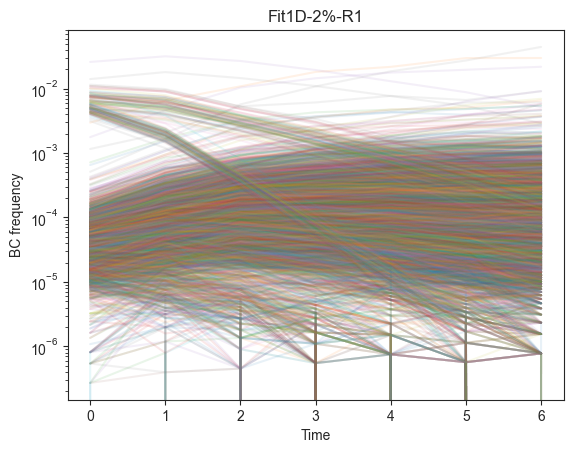

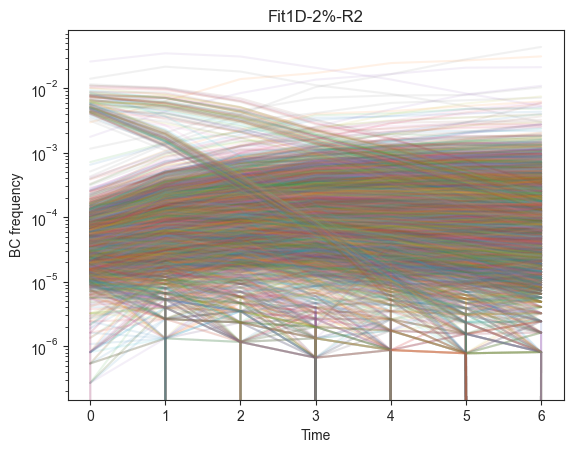

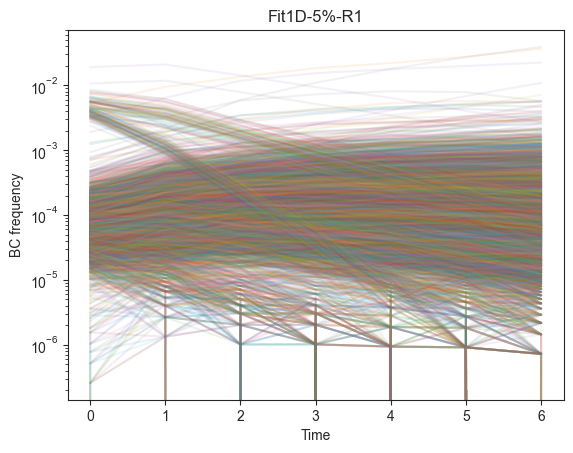

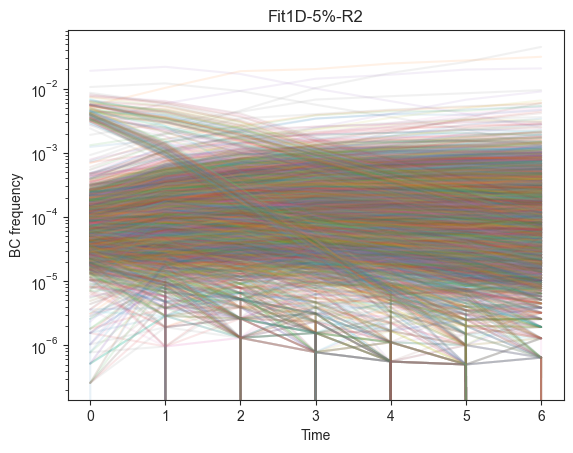

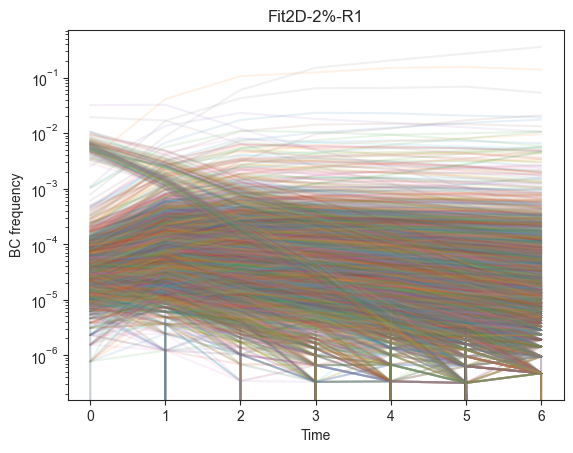

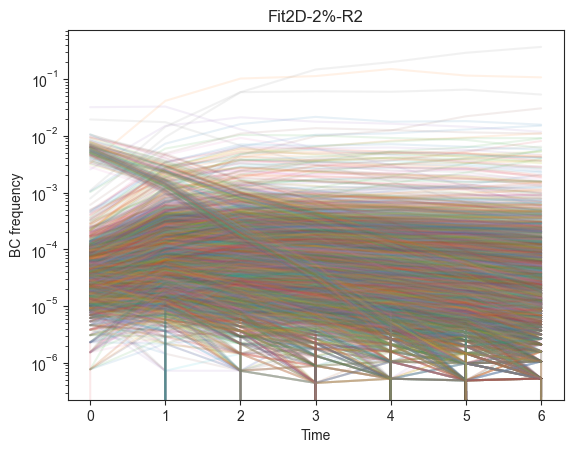

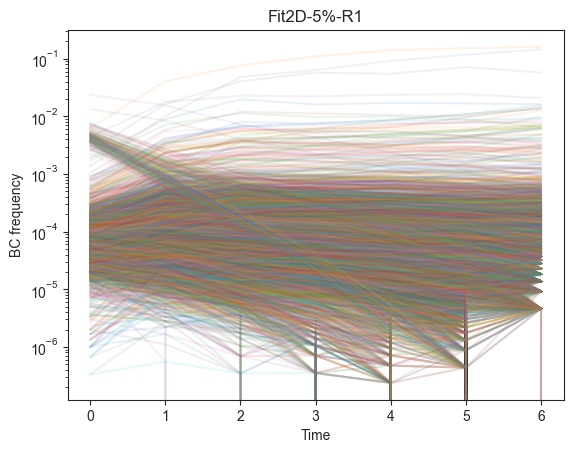

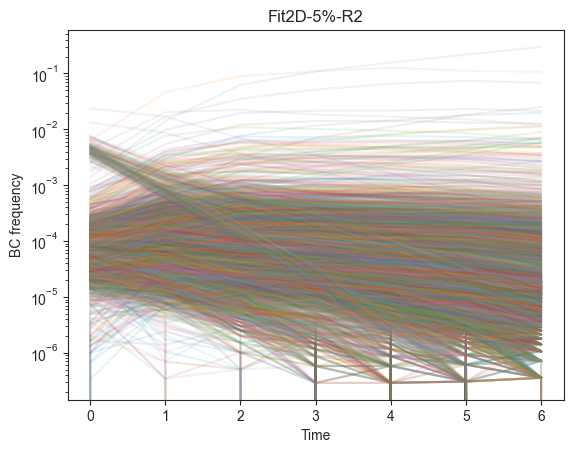

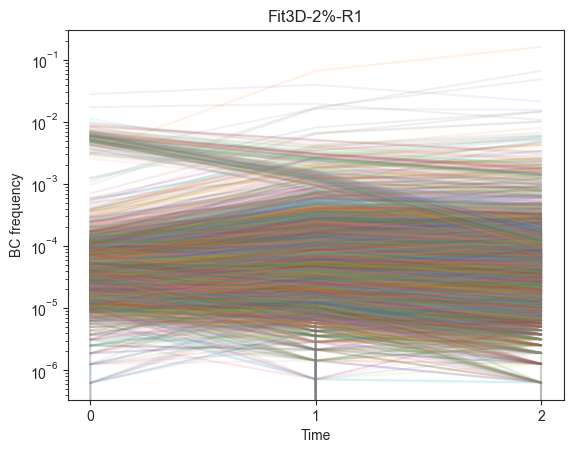

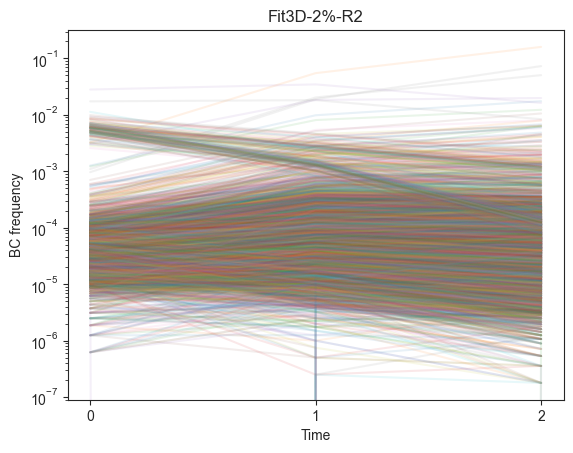

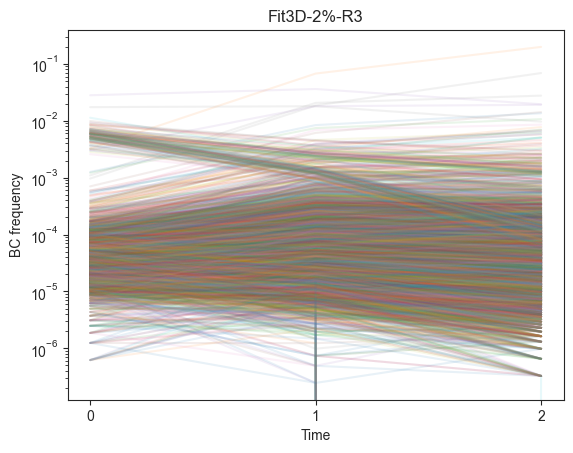

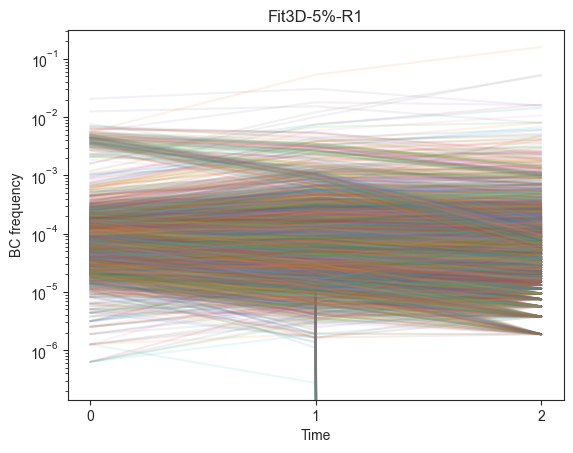

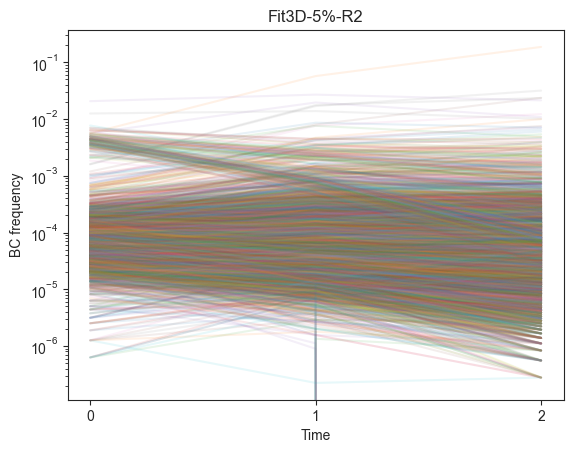

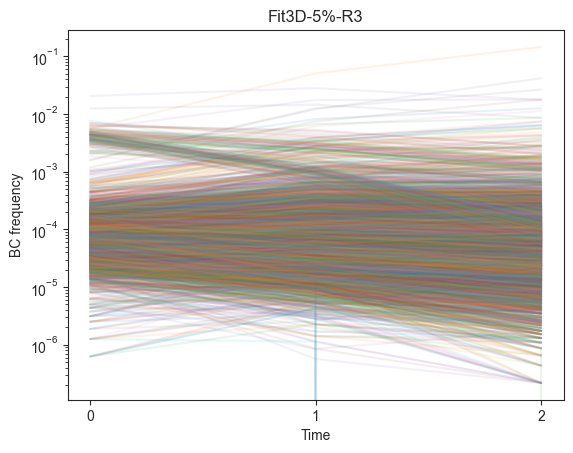

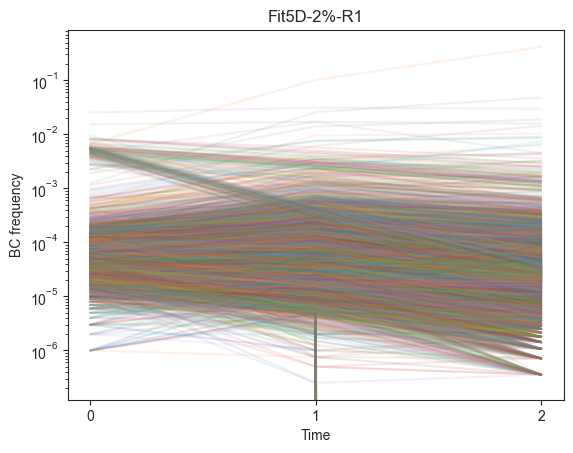

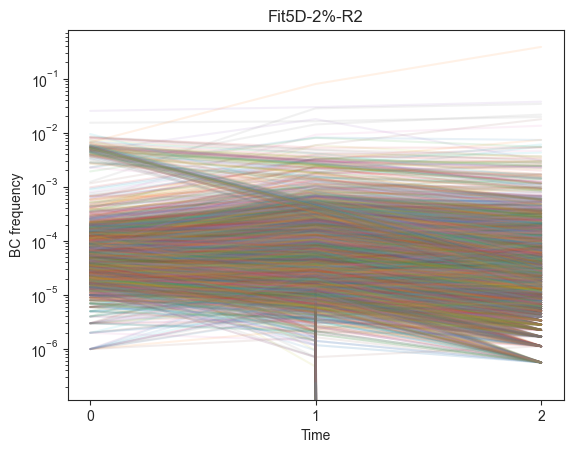

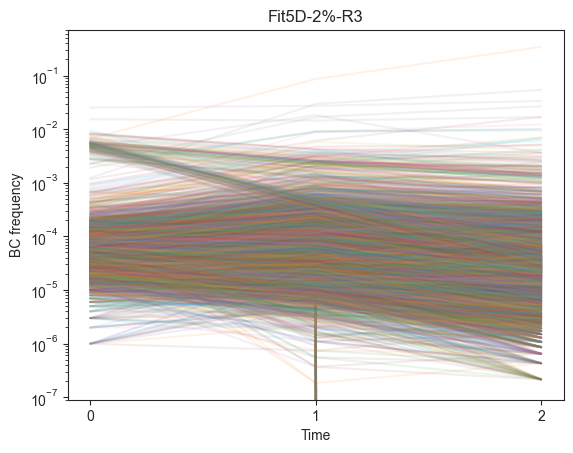

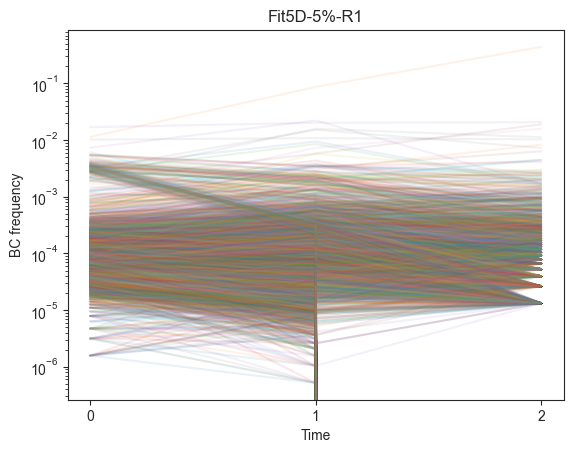

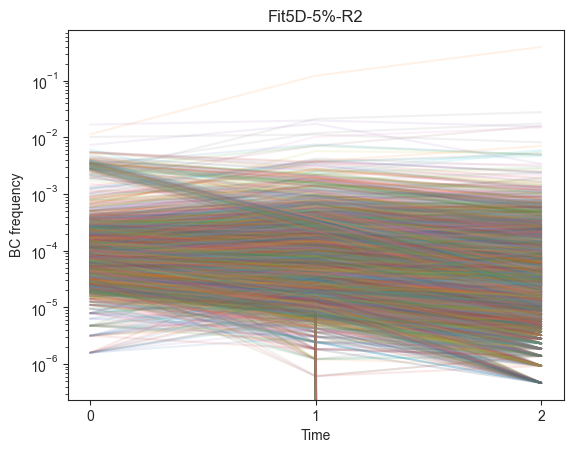

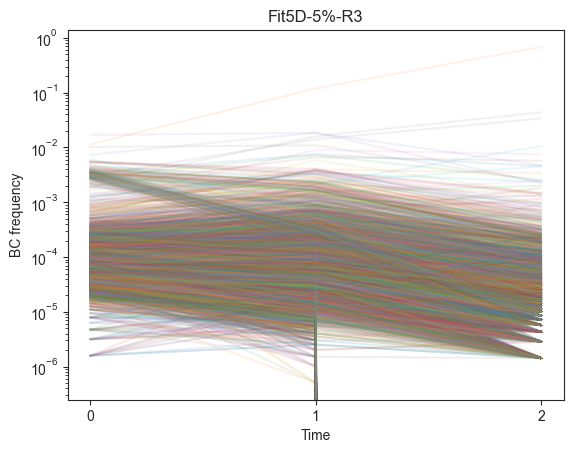

In [17]:
# non_neutral_indices = np.where(~bc_counts['barcode'].isin(neutra))[0]
# plt.style.use('dark_background')
# sns.set_context('talk')
# sns.set_palette('RdBu',8)


conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']
# condition = 'Fit2D'
# condition = 'Fit3D'
# condition = 'Fit5D'


# replicates = [1,2,3]
for condition in conditions:
    for rep in replicates[condition]:
        plt.figure()
        rep_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]

        these_counts = bc_counts[rep_times].values # get rid of ancestor sequence
        these_freqs = these_counts/np.nansum(these_counts,axis=0)

        plt.plot(range(timepoints[condition]),these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
        plt.yscale('log')
        plt.ylabel('BC frequency')
        
        plt.xticks(range(timepoints[condition]),range(timepoints[condition]))
        plt.xlabel('Time')
        
        plt.title(f'{condition}-R{rep}')

        plt.savefig(f'{home_dir}/figures/analysis/trajectories/{condition}-R{rep}_frequencytrajectories.pdf',bbox_inches='tight')

NameError: name 'source' is not defined

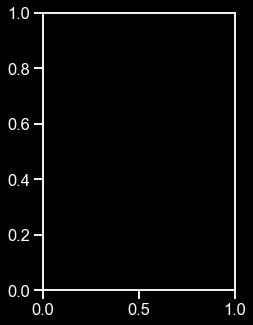

In [25]:



# conditions = ['Fit1D','Fit2D','Fit3D','Fit5D']
# conditions = ['Fit2D']
# condition = 'Fit2D'
# condition = 'Fit3D'
# condition = 'Fit5D'

# colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in merged_fitness['source_publication']]

publications = [['This_study','Venkataram2015','Li2019','Aggeli2020'],['Venkataram2015'],['Li2019'],['Aggeli2020'],['This_study']]
# replicates = [1,2,3]

pub_names = ['All mutants','Venkataram2016 mutants','Li2019 mutants','Aggeli2020 mutants','This study mutants']


for condition in conditions:
    plt.figure(figsize=(4*len(publications),6*len(replicates)))
    for rep in replicates[condition]:
        
        rep_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]

        these_counts = bc_counts[rep_times].values # get rid of ancestor sequence
        these_freqs = these_counts/np.nansum(these_counts,axis=0)
        
        for p,pub_set in enumerate(publications):
            
            ax = plt.subplot(len(replicates),len(publications),(rep-1)*len(publications)+p+1)
            
            pub_indices = np.where(bc_counts['source_publication'].isin(pub_set))[0]
            
#             these_colors = 
        
#             these_colors = ['b' if source=='This_study' else 'r' if source=='Li2019' else 'orange' if source == 'Aggeli2020' else 'k' for source in bc_counts['source_publication'].values[pub_indices]]
#             ax.set_color_cycle(these_colors)
            if source == 'This_study':
                sns.set_palette('Blues',8)
            elif source == 'Li2019':
                sns.set_palette('Reds',8)
            elif source == 'Aggeli2020':
                sns.set_palette('Oranges',8)
            else:
                sns.set_palette('Greens',8)
                
            plt.plot(range(timepoints[condition]),these_freqs.swapaxes(0,1)[:,pub_indices],alpha=0.03)
            plt.yscale('log')
            plt.ylabel('BC frequency')
            
            if p == 0:
                ymin,ymax = plt.ylim()
            else:
                plt.ylim(ymin,ymax)

            plt.xticks(range(timepoints[condition]),range(timepoints[condition]))
            plt.xlabel('Time')

            plt.title(f'{condition}-R{rep} {pub_names[p]}')
    
    plt.tight_layout()
#     plt.savefig(f'{condition}_frequencytrajectories_byPubSource_alpha03_DARK.pdf',bbox_inches='tight')

Fit1D-2%-R1
[3700938 2527989 2219395 1824354 1333313 1762964 1288419]
Fit1D-2%-R2
[3700938  754263  857085 1504769 1144488 1286105 1229090]
Fit1D-5%-R1
[3871961  750473  988916  984487 1066280 1095547 1381488]
Fit1D-5%-R2
[3871961 1046024  766434 1286895 1797826 1996888 1559747]
Fit2D-2%-R1
[1301779  824269 2920213 3038144 2970164 3168748 2117723]
Fit2D-2%-R2
[1301779 1380096 1379011 2258929 1902012 2043710 1887385]
Fit2D-5%-R1
[3003392 1801887 2894517 2840592 4223072 2294729  217569]
Fit2D-5%-R2
[3003392 2881035 1978403 3454999 3440172 3259674 2798475]
Fit3D-2%-R1
[1608264 1402346 1587241]
Fit3D-2%-R2
[1608264 4002449 5609272]
Fit3D-2%-R3
[1608264 4053858 3055494]
Fit3D-5%-R1
[1594049 3659273  532977]
Fit3D-5%-R2
[1594049 4487007 3610557]
Fit3D-5%-R3
[1594049 3529887 4583418]
Fit5D-2%-R1
[1006132 3997277 2806221]
Fit5D-2%-R2
[1006132 4253956 1780952]
Fit5D-2%-R3
[1006132 5427451 4661228]
Fit5D-5%-R1
[ 633162 1923365   75568]
Fit5D-5%-R2
[ 633162 1641901 2160975]
Fit5D-5%-R3
[ 633162 1

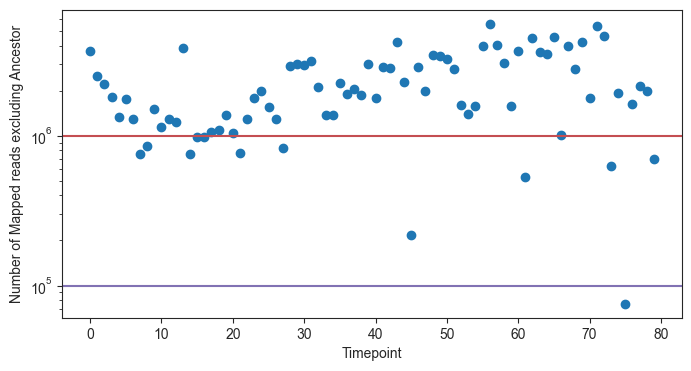

In [18]:
# conditions = ['Fit1D','Fit2D','Fit3D','Fit5D']
# replicates = [1,2,3]

rep_times = []

for condition in conditions:
    rep_times = rep_times + [f'{condition}-T0_combined']
    for rep in replicates[condition]:
        rep_times = rep_times + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]
        
        these_counts = bc_counts[[f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]].values
        print(f'{condition}-R{rep}')
        print(np.nansum(these_counts,axis=0))
        

these_counts = bc_counts[rep_times].values
#         these_freqs = np.nansum(these_counts,axis=0)

plt.figure(figsize=(8,4))
plt.plot(np.nansum(these_counts,axis=0),linestyle='',marker='o')
plt.yscale('log')
# for i in range(len(conditions)-1):
    
#     plt.axvline(x=13*(i+1)-0.5,color='k',alpha=0.5)
    
plt.ylabel('Number of Mapped reads excluding Ancestor')
plt.xlabel('Timepoint')

plt.axhline(10**6,color='r')
plt.axhline(10**5,color='m')

# plt.xticks([13*(i)+13/2 for i in range(len(conditions))],conditions)
# plt.xlim(-1,13*len(conditions))
# plt.axvline(x=)
#         plt.plot(range(5),these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
#         plt.yscale('log')
#         plt.ylabel('BC frequency')
# plt.savefig(f'/Coverage.pdf',bbox_inches='tight')

In [9]:
# conditions = ['Fit1D','Fit2D','Fit3D','Fit5D']
# condition = 'Fit2D'
# condition = 'Fit3D'
# condition = 'Fit5D'

# replicates = [1,2,3]

fig = plt.figure(figsize=(6*len(replicates),4*len(conditions)))
for c,condition in enumerate(conditions):
    for r,rep in enumerate(replicates):
        plt.subplot(len(conditions),len(replicates),len(replicates)*c+r+1)
        
        rep_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,5)]

        these_counts = bc_counts[rep_times].values # get rid of ancestor sequence
        these_freqs = these_counts/np.nansum(these_counts,axis=0)

        plt.plot(range(5),these_freqs.swapaxes(0,1)[:,:],alpha=0.1)
        plt.yscale('log')
        plt.ylabel('BC frequency')
        
        plt.xticks(range(5),range(5))
        plt.xlabel('Time')
        
        plt.title(f'{condition}-R{rep}')
        
plt.subplots_adjust(hspace=0.25, wspace=0.25)

# plt.savefig(f'plots/all_frequencytrajectories.pdf',bbox_inches='tight')

10179

In [13]:
bc_counts[(bc_counts['class']=='neutral_haploids') & (bc_counts['evolution_condition'] == 'Evo2D') & (bc_counts['ancestor'] == 'WT')]

BCID  Fit1D-5%-R1-T2  Fit5D-2%-R2-T2-PCRb  Fit1D-2%-R1-T4  \
962    962              63                   12              23   
1182  1182               1                    9               0   
1183  1183            1998                 1357            1393   
1532  1532            1916                 1445            1217   
1715  1715            2632                 2120            1985   
...    ...             ...                  ...             ...   
4988  4988              33                    6               9   
4990  4990               3                    4              14   
4991  4991              38                    6              14   
4992  4992            1892                  907            1222   
4993  4993            2821                 2467            1987   

      Fit5D-2%-R2-T1  Fit2D-2%-R1-T1  Fit5D-2%-R3-T2  Fit3D-2%-R3-T2  \
962               75              20              37              13   
1182              47               6              43              30   
1183           12298            2435            9584            4344   
1532           13154            2481            9268            5374   
1715           18249            3349           12790            6677   
...              ...             ...             ...             ...   
4988              24               8              10              20   
4990              27              23              17              77   
4991              37               9              24              20   
4992           10902            2333            4982            4018   
4993           22505            3867           17049            8998   

      Fit3D-5%-R2-T2-PCRb  Fit2D-5%-R2-T2  Fit1D-2%-R1-T3  Fit1D-2%-R1-T6  \
962                    11              20              75              11   
1182                   23               2               1               0   
1183                 1575            1213            3808             335   
1532                 1562            1178            3623             247   
1715                 2011            1510            5151             425   
...                   ...             ...             ...             ...   
4988                    3              16              22               4   
4990                   51              14               2               1   
4991                   10              12              17               1   
4992                  912            1355            3433             235   
4993                 2325            1949            5535             429   

      Fit2D-2%-R1-T4  Fit5D-2%-R3-T1  Fit2D-5%-R1-T4  Fit1D-2%-R1-T2  \
962                3             106              13             114   
1182               2              23               0               0   
1183             438           13064             559            8098   
1532             416           14217             596            7502   
1715             628           19741             843           10951   
...              ...             ...             ...             ...   
4988               0              18               8              36   
4990              21              24              10               3   
4991               1              36               9              51   
4992             417           13112             597            8427   
4993             740           23462             897           10734   

      Fit2D-2%-R2-T4  Fit5D-5%-R3-T2  Fit2D-5%-R1-T2  Fit2D-2%-R1-T5  \
962                3               0              35               0   
1182               4               0               8               0   
1183             348               0            1977             115   
1532             306               0            1733             121   
1715             440               0            2496             211   
...              ...             ...             ...             ...   
4988               1               0      

In [14]:
np.unique(bc_counts['source_publication'],return_counts=True)

(array(['Aggeli2020', 'Li2019', 'This_study', 'Venkataram2015'],
       dtype=object),
 array([2481,  461, 1579,  506]))

In [15]:
np.unique(bc_counts[bc_counts['source_publication']=='Aggeli2020']['barcode_lowcomplexity'],return_counts=True)

(array(['ACTTAAAAAGCAAACATGATTATTCA', 'AGAACAAAAACTAAACTCATTCATGG',
        'ATCAGAAGTTCGAATCAAATTACGAA', 'CAGAAAAGCCATAACGCTATTTGAAA',
        'CCAACAAAAGGAAACGTATTTATTGA', 'CCGCCAATCCCGAACCCCGTTTCGCC',
        'CTAGAAATCTCAAAAACTTTTGGCTG', 'GACAGAAAAGCCAAATGGATTTACCG',
        'GTATTAAAATTAAAAATAATTGCACA', 'TTAAAAATACAAAAAAAGATTTAAGG'],
       dtype=object),
 array([ 66, 148, 336,  41, 421, 611,  41, 239, 187, 391]))

In [16]:
np.unique(bc_counts[bc_counts['source_publication']=='This_study']['barcode_lowcomplexity'],return_counts=True)

(array(['AATGCAATAATGAAATGATTTGAGGA', 'ACTTAAAAAGCAAACATGATTATTCA',
        'AGAACAAAAACTAAACTCATTCATGG', 'ATCACAATAACTAAACTGATTCTTCA',
        'ATCAGAAGTTCGAATCAAATTACGAA', 'CAGAAAAGCCATAACGCTATTTGAAA',
        'CATAAAAAGACTAATCTTATTAATGC', 'CATTGAATCACAAAATAGGTTAGATG',
        'CCAACAAAACACAAATCTGTTGTGTA', 'CCAACAAAAGGAAACGTATTTATTGA',
        'CCGCCAATCCCGAACCCCGTTTCGCC', 'CTAGAAATCTCAAAAACTTTTGGCTG',
        'GAAATAAACCACAACGACATTCTAAT', 'GACAGAAAAGCCAAATGGATTTACCG',
        'GTATTAAAATTAAAAATAATTGCACA', 'TATCGAAACCCAAAGAGATTTAATCG',
        'TGATCAATCTACAAAAATATTTAATG', 'TGTACAAATCTTAAGAAGATTACAAG',
        'TTAAAAATACAAAAAAAGATTTAAGG'], dtype=object),
 array([  3,  31,  77, 135, 127,  22, 191,  66,  95, 167, 250,  16,   6,
        111,  80,  32,  79,   3,  88]))

In [17]:
handpicked_neutrals = ['CGCTAAAGACATAATGTGGTTTGTTG_TTTTTAAAATGAAACAAGCTTGTATG',
'CGCTAAAGACATAATGTGGTTTGTTG_ATCTTAAGATAAAAGGCATTTTATTC',
'CGCTAAAGACATAATGTGGTTTGTTG_ACAGCAACCGTGAATGTACTTCGCAC',
'CGCTAAAGACATAATGTGGTTTGTTG_AGTATAAGCGCTAAATAATTTTCTCC',
'CGCTAAAGACATAATGTGGTTTGTTG_AGCATAATCTTTAACACGCTTGTCAG',
'CGCTAAAGACATAATGTGGTTTGTTG_CCGTTAAAAAGAAATGATTTTTATAG',
'CGCTAAAGACATAATGTGGTTTGTTG_CCAGTAATTGGAAAACTCCTTGGGAA',
'CGCTAAAGACATAATGTGGTTTGTTG_ATAGCAACCCAGAAGATCCTTATCTG',
'CGCTAAAGACATAATGTGGTTTGTTG_CTGAAAAGAGATAAATATTTTACATC',
'CGCTAAAGACATAATGTGGTTTGTTG_GGAACAAATCAAAATTAATTAACAAA',
'CGCTAAAGACATAATGTGGTTTGTTG_TAGGAAATTCCAAAGAAATTTGGTAA',
'CGCTAAAGACATAATGTGGTTTGTTG_GTTAAAAATGAGAAGTCTATTCGCTT',
'CGCTAAAGACATAATGTGGTTTGTTG_TGGAAAAACGCCAAGGGCGTTTTATC',
'CGCTAAAGACATAATGTGGTTTGTTG_CTATTAACCGACAATCATCTTAATTT',
'CGCTAAAGACATAATGTGGTTTGTTG_CATCTAATTGATAACTTCTTTCCCGC',
'CGCTAAAGACATAATGTGGTTTGTTG_ATGGAAACAAAAAATAGTATTCGCAC',
'CGCTAAAGACATAATGTGGTTTGTTG_TAAGAAAATCAGAACCGCTTTCAGGG',
'CGCTAAAGACATAATGTGGTTTGTTG_GCTTTAATGAAAAATTATTTTGGCTG',
'CGCTAAAGACATAATGTGGTTTGTTG_CTCCTAACCAGTAATAACTTTCTCAA',
'CGCTAAAGACATAATGTGGTTTGTTG_GTCCAAAACAACAAATGCACTTGCAA',
'CGCTAAAGACATAATGTGGTTTGTTG_TTTTTAATTTGCAAGGACCTTAGTCT',
'CGCTAAAGACATAATGTGGTTTGTTG_TGCATAACCTGCAAACAGATTGCCGT',
'CGCTAAAGACATAATGTGGTTTGTTG_GCATCAATGATCAACGCGGTTACCTG',
'CGCTAAAGACATAATGTGGTTTGTTG_AGGCTAATACCCAATTCGATTGTCAT',
'CGCTAAAGACATAATGTGGTTTGTTG_TTTTCAAATAGTAATTGATTTCCAGT',
'CGCTAAAGACATAATGTGGTTTGTTG_AAGCTAATTGAGAATTATTTTGCATT',
'CGCTAAAGACATAATGTGGTTTGTTG_TTGCGAATACGTAATTTTGTTGCGGG',
'CGCTAAAGACATAATGTGGTTTGTTG_CAGTAAACGATCAAATACTTTCAATA',
'CGCTAAAGACATAATGTGGTTTGTTG_TAACAAATGTCTAATGGAATTTTGCA',
'CGCTAAAGACATAATGTGGTTTGTTG_GTTGTAATCTCGAAGAGATTTCTAGC',
'CGCTAAAGACATAATGTGGTTTGTTG_AGAATAAATGAAAAATCATTTAATAT',
'CGCTAAAGACATAATGTGGTTTGTTG_TCAAAAAATTAAAACCAATTTATCTC',
'CGCTAAAGACATAATGTGGTTTGTTG_ATACTAAAAAGTAAAGTGGTTATTCT',
'CGCTAAAGACATAATGTGGTTTGTTG_TACGAAAGCTCTAATGCATTTACAAG',
'CGCTAAAGACATAATGTGGTTTGTTG_CTCGTAAGCTGTAAGCCTTTTGATTG',
'CGCTAAAGACATAATGTGGTTTGTTG_CACGTAACGCAGAAGTGCTTTGAAAG',
'CGCTAAAGACATAATGTGGTTTGTTG_CTACGAACTACGAAATGCCTTGTTTC',
'CGCTAAAGACATAATGTGGTTTGTTG_GACTAAAACTGTAACATTTTTAATGG',
'CGCTAAAGACATAATGTGGTTTGTTG_GAGGAAAATTATAACGAATTTTGTCG',
'CGCTAAAGACATAATGTGGTTTGTTG_CGATTAACTAATAATTCTTTTTAAAG',
'CGCTAAAGACATAATGTGGTTTGTTG_TTTCCAAATGTAAAGCGTATTCATAC',
'CGCTAAAGACATAATGTGGTTTGTTG_GGTAGAATATGGAATGTTTTTACGAA',
'CGCTAAAGACATAATGTGGTTTGTTG_GTGTGAATCAATAAGCATATTGTTTA',
'CGCTAAAGACATAATGTGGTTTGTTG_TCCCCAACCATTAATTATGTTTACAC',
'CGCTAAAGACATAATGTGGTTTGTTG_ACCCCAAATACCAAAGGAGTTGCGTG',
'CGCTAAAGACATAATGTGGTTTGTTG_TCGACAAATTGCAAGAAGGTTTCATC',
'CGCTAAAGACATAATGTGGTTTGTTG_TCGATAATGACCAATACCATTTTGTC',
'CGCTAAAGACATAATGTGGTTTGTTG_CGGAAAACATTGAACTTTATTAATGG',
'CGCTAAAGACATAATGTGGTTTGTTG_AGGGAAAACAGGAAACCCGTTTCCCT',
'CGCTAAAGACATAATGTGGTTTGTTG_TTTTCAACCGGTAATTAAATTCTCGT',
'CGCTAAAGACATAATGTGGTTTGTTG_ATTCAAATCGAAAATGATGTTCTTCA',
'CGCTAAAGACATAATGTGGTTTGTTG_AATAGAACCCCAAATATTTTTTCTCG',
'CGCTAAAGACATAATGTGGTTTGTTG_TGCTTAAGCGCGAAATGCTTTACACC',
'CGCTAAAGACATAATGTGGTTTGTTG_CGGCCAATTTGGAAGTCGCTTATATA',
'CGCTAAAGACATAATGTGGTTTGTTG_TTCATAAACTCTAACAACCTTTTTAG',
'CGCTAAAGACATAATGTGGTTTGTTG_ACGAGAATAGCAAACGCAGTTGAGCG',
'CGCTAAAGACATAATGTGGTTTGTTG_GCATCAAGAATAAAGCGGGTTCCGCT',
'CGCTAAAGACATAATGTGGTTTGTTG_CAAATAATCAAGAACGGCCTTATGTT',
'CGCTAAAGACATAATGTGGTTTGTTG_AAAGAAAAGCTTAAAGATATTGATGA',
'CGCTAAAGACATAATGTGGTTTGTTG_CAATCAAGGGTCAATTAACTTTTCAA']

handpicked_neutrals_BCID = bc_counts[bc_counts['barcode'].isin(handpicked_neutrals)]['BCID'].values
neutrals = bc_counts[(bc_counts['class']=='neutral_haploids') & 
                     (bc_counts['evolution_condition'] == 'Evo2D') & 
                     (bc_counts['ancestor'] == 'WT')]['BCID'].values
li2019_neutrals = bc_counts[(bc_counts['class']=='neutral_haploids') & 
#                      (bc_counts['evolution_condition'] == 'Evo2D') & 
                     (bc_counts['source_publication']=='Li2019')]['BCID'].values

In [18]:
## Calculate percentage of population that is barcoded at each timepoint.
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']
initial_fraction = {'Fit1D-2%':0.06, # BC pool is 2%, each neutral pool 2% 
                    'Fit1D-5%':0.09, # BC pool is 5%, each neutral pool 2% 
                    'Fit2D-2%':0.06,
                    'Fit2D-5%':0.09,
                    'Fit3D-2%':0.06,
                    'Fit3D-5%':0.09,
                    'Fit5D-2%':0.06,
                    'Fit5D-5%':0.09}
frac_barcoded = {}
frac_barcoded_adaptive = {}
reads = {}
# conditions = ['Fit1D','Fit2D','Fit3D','Fit5D']
for condition in conditions:
    rep_times = {}
    r_timepoints = []
    
   
    
    for rep in replicates[condition]:
        
        these_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]
        these_timepoints = [t for t in range(timepoints[condition])]
        
        neutral_counts = np.sum(bc_counts[bc_counts['BCID'].isin(neutrals)][these_times].values,axis=0)
        li_neutral_counts = np.sum(bc_counts[bc_counts['BCID'].isin(li2019_neutrals)][these_times].values,axis=0)
        total_counts = np.sum(bc_counts[these_times].values,axis=0)
        
        neutral_fraction = neutral_counts/total_counts
        print(these_times,'\n',neutral_fraction)
        total_neutral_fraction = (neutral_counts+li_neutral_counts)/total_counts
        
        
        
        q = initial_fraction[condition]/(1-initial_fraction[condition])*neutral_fraction[0]
        
        frac_barcoded[f'{condition}-R{rep}'] = q/(q+neutral_fraction)
        frac_barcoded_adaptive[f'{condition}-R{rep}'] = (1-total_neutral_fraction)*q/(q+neutral_fraction)
        print((1-total_neutral_fraction)*q/(q+neutral_fraction))
        reads[f'{condition}-R{rep}'] = total_counts

['Fit1D-2%-T0_combined', 'Fit1D-2%-R1-T1_combined', 'Fit1D-2%-R1-T2_combined', 'Fit1D-2%-R1-T3_combined', 'Fit1D-2%-R1-T4_combined', 'Fit1D-2%-R1-T5_combined', 'Fit1D-2%-R1-T6_combined'] 
 [0.41669274 0.34132308 0.18534871 0.10185742 0.05086428 0.02522116
 0.01112604]
[0.01679654 0.03877816 0.0990744  0.18502084 0.32561373 0.50026468
 0.69720261]
['Fit1D-2%-T0_combined', 'Fit1D-2%-R2-T1_combined', 'Fit1D-2%-R2-T2_combined', 'Fit1D-2%-R2-T3_combined', 'Fit1D-2%-R2-T4_combined', 'Fit1D-2%-R2-T5_combined', 'Fit1D-2%-R2-T6_combined'] 
 [0.41669274 0.34838379 0.21713949 0.1011524  0.0524846  0.02449567
 0.01131162]
[0.01679654 0.03859004 0.08290013 0.18620736 0.31844365 0.50774083
 0.69366423]
['Fit1D-5%-T0_combined', 'Fit1D-5%-R1-T1_combined', 'Fit1D-5%-R1-T2_combined', 'Fit1D-5%-R1-T3_combined', 'Fit1D-5%-R1-T4_combined', 'Fit1D-5%-R1-T5_combined', 'Fit1D-5%-R1-T6_combined'] 
 [0.30767407 0.21173047 0.10423231 0.05246692 0.02546517 0.01244492
 0.00598557]
[0.04097484 0.08988761 0.1991138 

In [19]:
# plt.figure(figsize=(8,16))
for c,condition in enumerate(conditions):
    frac_adaptive = 0
    for rep in replicates[condition]:
        if rep == 1:
            avg = frac_barcoded_adaptive[f'{condition}-R{rep}']
        else:
            avg = avg + frac_barcoded_adaptive[f'{condition}-R{rep}']
    print(condition)
    print(avg/len(replicates[condition]))

Fit1D-2%
[0.01679654 0.0386841  0.09098726 0.1856141  0.32202869 0.50400276
 0.69543342]
Fit1D-5%
[0.04097484 0.0889689  0.18622987 0.34118621 0.52695719 0.6987669
 0.83475458]
Fit2D-2%
[0.01668408 0.10005346 0.2963156  0.50691361 0.73253967 0.8888667
 0.95363837]
Fit2D-5%
[0.04208657 0.21189897 0.42800297 0.61254295 0.80452702 0.91862601
 0.96678403]
Fit3D-2%
[0.018308   0.09746401 0.19840114]
Fit3D-5%
[0.0446738  0.11381921 0.22471532]
Fit5D-2%
[0.02352938 0.0925182  0.16074783]
Fit5D-5%
[0.05331967 0.14100396 0.37074565]


[0.01679654 0.03877816 0.0990744  0.18502084 0.32561373 0.50026468
 0.69720261]
[0.01679654 0.03859004 0.08290013 0.18620736 0.31844365 0.50774083
 0.69366423]
[0.04097484 0.08988761 0.1991138  0.34681058 0.53028763 0.70083547
 0.83061269]
[0.04097484 0.0880502  0.17334594 0.33556184 0.52362674 0.69669833
 0.83889647]
[0.01668408 0.0982661  0.30497456 0.5236933  0.74382209 0.9023462
 0.95886954]
[0.01668408 0.10184081 0.28765664 0.49013391 0.72125725 0.8753872
 0.9484072 ]
[0.04208657 0.20414912 0.42310295 0.58388309 0.78180444 0.90293329
 0.95946741]
[0.04208657 0.21964882 0.43290299 0.64120282 0.82724961 0.93431873
 0.97410066]
[0.018308   0.09202843 0.17297361]
[0.018308   0.09726202 0.2250882 ]
[0.018308   0.10310157 0.19714161]
[0.0446738  0.10359838 0.24730583]
[0.0446738  0.12810736 0.19830512]
[0.0446738 0.1097519 0.228535 ]
[0.02352938 0.08874431 0.17179893]
[0.02352938 0.08752374 0.14778216]
[0.02352938 0.10128654 0.16266239]
[0.05331967 0.13788072 0.23298771]
[0.05331967 0.1

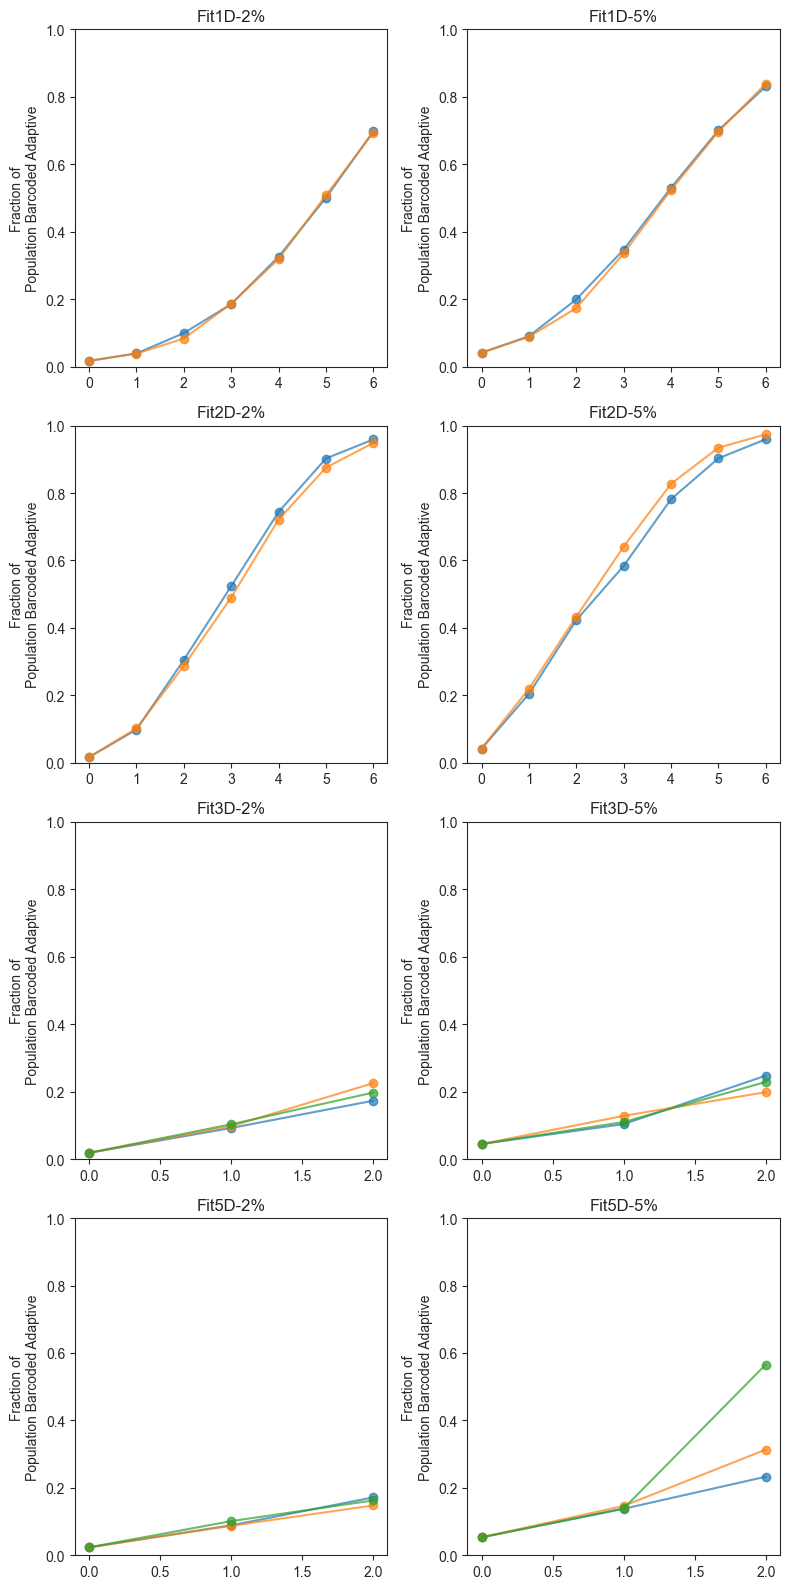

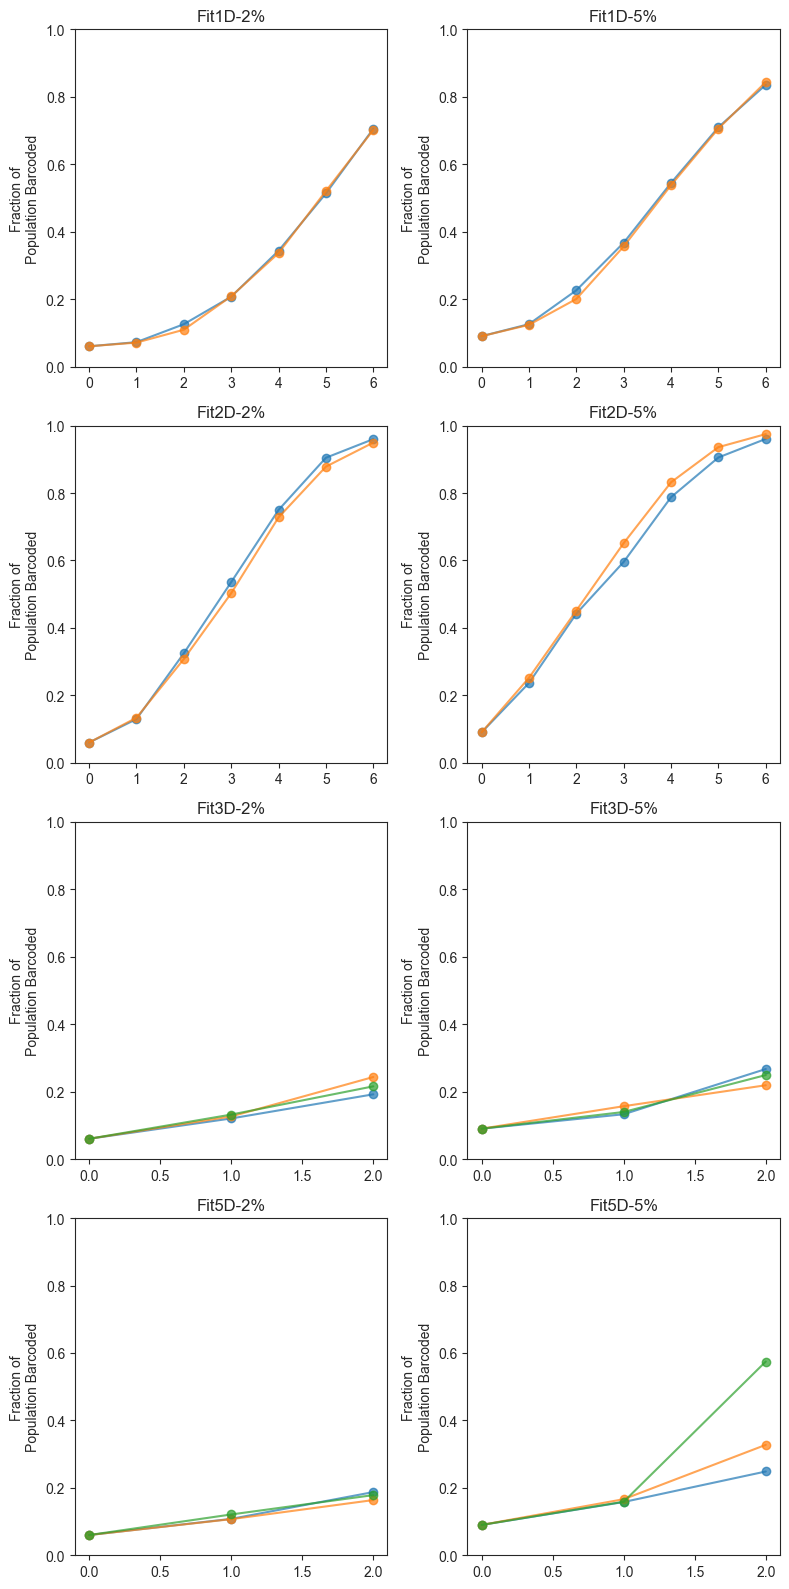

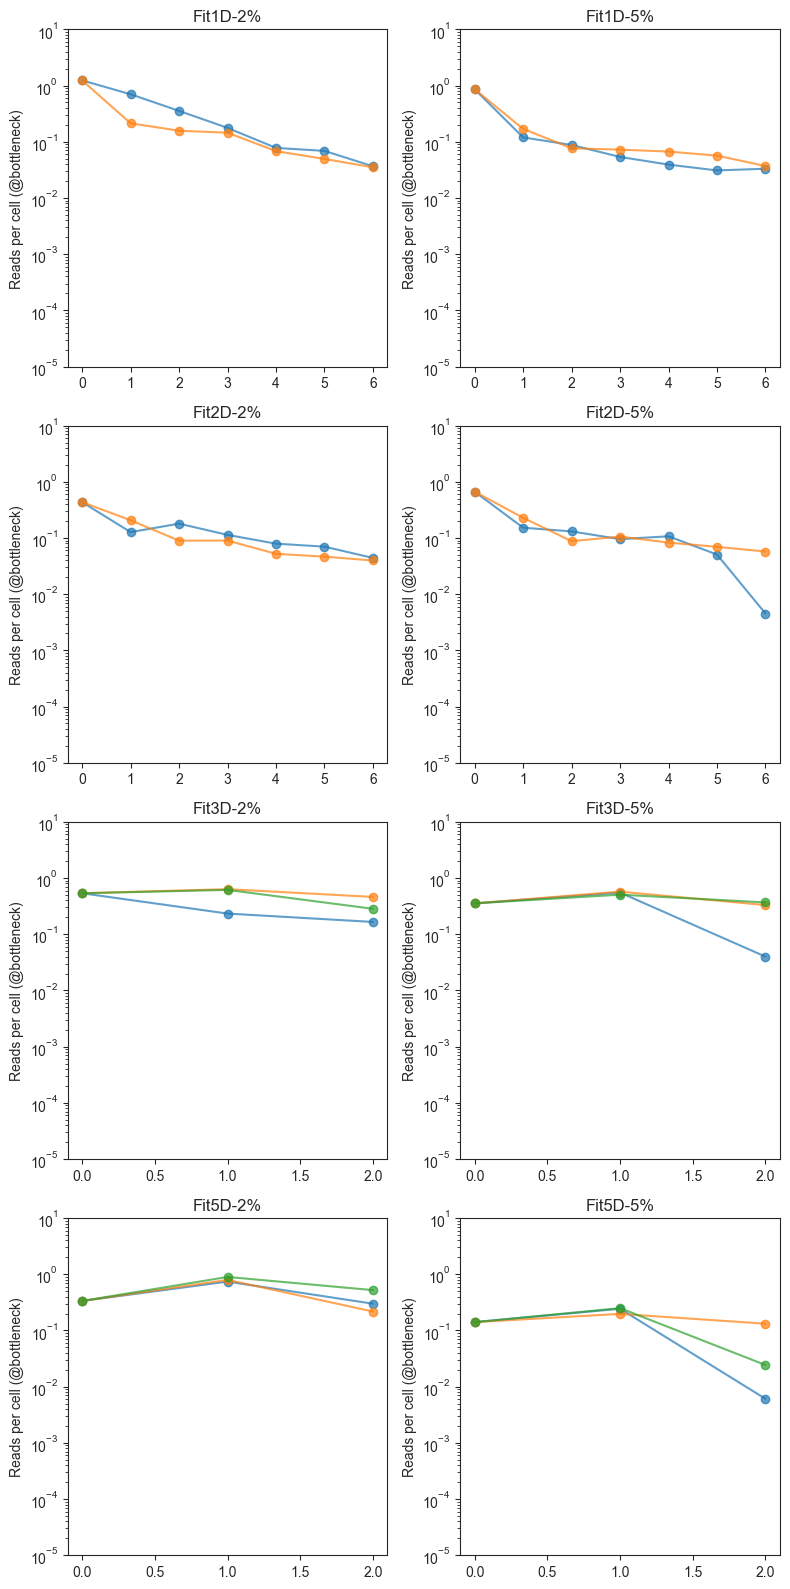

In [20]:
frac_barcoded
plt.figure(figsize=(8,16))
for c,condition in enumerate(conditions):
    plt.subplot(4,2,c+1)
    plt.title(condition)
    for rep in replicates[condition]:
        plt.plot(frac_barcoded_adaptive[f'{condition}-R{rep}'],marker='o',alpha=0.7)
        print(frac_barcoded_adaptive[f'{condition}-R{rep}'])
    plt.ylabel('Fraction of\nPopulation Barcoded Adaptive')
    plt.ylim(0,1)
plt.tight_layout()
# plt.savefig('plots/fraction_barcoded_adaptive.pdf',bbox_inches='tight')

plt.figure(figsize=(8,16))
for c,condition in enumerate(conditions):
    plt.subplot(4,2,c+1)
    plt.title(condition)
    for rep in replicates[condition]:
        plt.plot(frac_barcoded[f'{condition}-R{rep}'],marker='o',alpha=0.7)
        print(frac_barcoded[f'{condition}-R{rep}'])
    plt.ylabel('Fraction of\nPopulation Barcoded')
    plt.ylim(0,1)
plt.tight_layout()
# plt.savefig('plots/fraction_barcoded.pdf',bbox_inches='tight')

plt.figure(figsize=(8,16))
for c,condition in enumerate(conditions):
    plt.subplot(4,2,c+1)
    plt.title(condition)
    for rep in replicates[condition]:
        print(reads[f'{condition}-R{rep}']/(frac_barcoded[f'{condition}-R{rep}']*5*10**7))
        plt.plot(reads[f'{condition}-R{rep}']/(frac_barcoded[f'{condition}-R{rep}']*5*10**7),marker='o',alpha=0.7)
    plt.ylabel('Reads per cell (@bottleneck)')
    plt.yscale('log')
    plt.ylim(10**-5,10)
plt.tight_layout()
# plt.savefig('plots/CoverageRatio.pdf',bbox_inches='tight')


# plt.

In [21]:
remove_swaps = True
weighted = True
save_output = True


save_for_later_dict = {}

cov_thresh = 5*10**4

fitnesses = {}
time_fitnesses = {}

cols_to_remove = []

# n_timepoints = 5
# n_timepoints = 4

for condition in conditions:
    rep_times = {}
    r_timepoints = []
    for rep in replicates[condition]:
        
        these_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]
        these_timepoints = [t for t in range(timepoints[condition])]
        
                    
        r_timepoints.append(timepoints)
        
        rep_times[rep] = np.nan_to_num(bc_counts[these_times].values,0)
        
        for entry in these_times:
            cols_to_remove.append(entry) # don't include the count files in the final fitness dataframe
        
        print(f'{condition}-R{rep}')
        print(np.sum(rep_times[rep],axis=0))
    print(f'{condition}')
#     answer = atish.inferFitness(bc_counts['BCID'].values,these_timepoints,rep_times,
#                                 neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=False,useMultNoise=True,weightedMean=weighted)
    answer = atish.inferFitness(bc_counts['BCID'].values,these_timepoints,rep_times,
                                neutralBarcodes=handpicked_neutrals_BCID,lowCoverageThresh=cov_thresh,use_all_neutral=False,useMultNoise=True,weightedMean=weighted)

   
    for rep in replicates[condition]:
        save_for_later_dict[rep] = answer[rep]

    for rep in replicates[condition]:
        
        fitnesses[f'{condition}-R{rep}_fitness'] = answer[rep]['aveFitness']
        fitnesses[f'{condition}-R{rep}_error'] = answer[rep]['aveError']
        time_fitnesses[f'{condition}-R{rep}_fitness'] = answer[rep]['allTimeFitness']
        time_fitnesses[f'{condition}-R{rep}_error'] = answer[rep]['allTimeErrors']


fitness_df = p.DataFrame(fitnesses)
fitness_df = fitness_df.replace([np.inf, -np.inf], np.nan)

# fitness_df_time = p.DataFrame(time_fitnesses)
# fitness_df_time = fitness_df_time.replace([np.inf, -np.inf], np.nan)

for col in [column for column in bc_counts.columns if column not in cols_to_remove]:
    fitness_df[col] = bc_counts[col].values

for condition in conditions:
    
#     fitness,error = tools.inverse_variance_mean(fitness_df[f'{condition}-R{rep}_fitness'].values,)


    condition_fitness, condition_error = tools.inverse_variance_mean(fitness_df[[f'{condition}-R{rep}_fitness'for rep in replicates[condition]]].values,
                                                                     fitness_df[[f'{condition}-R{rep}_error'for rep in replicates[condition]]].values,
                                                                    )
    fitness_df[f'{condition}_fitness'] = condition_fitness  
    fitness_df[f'{condition}_error'] = condition_error

    # remove barcodes if ever is nan for a fitness value
fitness_df = fitness_df.dropna(subset = [col for col in fitness_df.columns if '_fitness' in col])

# fitness_df = fitness_df[[col for col in fitness_df if col not in other_info]]


Fit1D-2%-R1
[3700938 2527989 2219395 1824354 1333313 1762964 1288419]
Fit1D-2%-R2
[3700938  754263  857085 1504769 1144488 1286105 1229090]
Fit1D-2%
neutrals inside 56
neutral reads True 26959.0 14286.0
neutral reads True 14286.0 6622.0
neutral reads True 6622.0 2942.5
neutral reads True 2942.5 1086.5
neutral reads True 1086.5 683.0
neutral reads True 683.0 231.5
neutral reads False 26959.0 14290.5
neutral reads False 14290.5 6667.0
neutral reads False 6667.0 3037.0
neutral reads False 3037.0 1093.5
neutral reads False 1093.5 697.5
neutral reads False 697.5 232.5
neutral reads True 26959.0 4394.5
neutral reads True 4394.5 3027.0
neutral reads True 3027.0 2401.0
neutral reads True 2401.0 952.5
neutral reads True 952.5 483.5
neutral reads True 483.5 219.0
neutral reads False 27628.0 4470.0
neutral reads False 4470.0 3103.0
neutral reads False 3103.0 2587.0
neutral reads False 2587.0 1020.0
neutral reads False 1020.0 530.0
neutral reads False 530.0 220.0
Multiplicative noise consistency c

/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:235: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:235: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:406: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:406: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totRe

/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront//code/processing/tools/tools.py:244: RuntimeWarning: invalid value encountered in divide
  weighted_mean = np.nansum(means/variances,axis=axis)/(np.nansum(1/variances,axis=axis))
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront//code/processing/tools/tools.py:246: RuntimeWarning: divide by zero encountered in reciprocal
  weighted_standard_devs = np.sqrt((np.nansum(1/variances,axis=axis))**(-1))


In [22]:
li_fitnesses = {}

li_neutral_indices = np.where(np.isin(bc_counts['BCID'].values,li2019_neutrals))

for condition in conditions:

    for rep in replicates[condition]:
        
#         li_offset1 = np.nanmean(fitnesses[f'{condition}-R{rep}_fitness'][li_neutral_indices])
        li_offset = np.nanmedian(fitnesses[f'{condition}-R{rep}_fitness'][li_neutral_indices])
        
#         li_offset = tools.inverse_variance_mean(fitnesses[f'{condition}-R{rep}_fitness'][li_neutral_indices],
#                                                fitnesses[f'{condition}-R{rep}_error'][li_neutral_indices])
        print(f'{condition}-R{rep}',li_offset)
        
        li_fitnesses[f'{condition}-R{rep}_fitness'] = fitnesses[f'{condition}-R{rep}_fitness'] - li_offset
        li_fitnesses[f'{condition}-R{rep}_error'] = fitnesses[f'{condition}-R{rep}_error']


fitness_df_li2019neutrals = p.DataFrame(li_fitnesses)
fitness_df_li2019neutrals = fitness_df_li2019neutrals.replace([np.inf, -np.inf], np.nan)

for col in [column for column in bc_counts.columns if column not in cols_to_remove]:
    fitness_df_li2019neutrals[col] = bc_counts[col].values

for condition in conditions:
    
    
    condition_fitness_li, condition_error_li = tools.inverse_variance_mean(fitness_df_li2019neutrals[[f'{condition}-R{rep}_fitness'for rep in replicates[condition]]].values,
                                                                     fitness_df_li2019neutrals[[f'{condition}-R{rep}_error'for rep in replicates[condition]]].values,
                                                                    )
    fitness_df_li2019neutrals[f'{condition}_fitness'] = condition_fitness_li
    fitness_df_li2019neutrals[f'{condition}_error'] = condition_error_li

fitness_df_li2019neutrals = fitness_df_li2019neutrals.dropna(subset = [col for col in fitness_df_li2019neutrals.columns if '_fitness' in col])

# fitness_df = fitness_df[[col for col in fitness_df if col not in other_info]]



Fit1D-2%-R1 -0.7916047301231127
Fit1D-2%-R2 -0.9336159888323513
Fit1D-5%-R1 -0.8419170937017317
Fit1D-5%-R2 -0.9036312373729554
Fit2D-2%-R1 -0.6932099755544052
Fit2D-2%-R2 -0.6979665920295812
Fit2D-5%-R1 -0.6972255214172459
Fit2D-5%-R2 -0.7445097398696735
Fit3D-2%-R1 -1.0267638681507374
Fit3D-2%-R2 -1.0879486957060163
Fit3D-2%-R3 -0.9370616921937401
Fit3D-5%-R1 -1.078286595604238
Fit3D-5%-R2 -1.0725433238553579
Fit3D-5%-R3 -1.0281665721651596
Fit5D-2%-R1 -1.9271716521723201
Fit5D-2%-R2 -1.75743234728708
Fit5D-2%-R3 -1.719016353791939
Fit5D-5%-R1 -1.7936292959407205
Fit5D-5%-R2 -1.5870844632782335
Fit5D-5%-R3 -1.6520637580744157


/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/700448159.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fitness_df_li2019neutrals[col] = bc_counts[col].values
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/700448159.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fitness_df_li2019neutrals[col] = bc_counts[col].values
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/700448159.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [23]:
# merge the two sets of inferences using appropriate neutrals

merged_fitness = fitness_df.merge(fitness_df_li2019neutrals,how='inner',on=[col for col in fitness_df.columns 
                                                                            if 'Fit' not in col])
x_cols = [col for col in merged_fitness.columns if '_x' in col]
y_cols = [col for col in merged_fitness.columns if '_y' in col]
merged_fitness = merged_fitness.rename(columns={col:col.replace('_x','') for col in x_cols})
merged_fitness = merged_fitness.rename(columns={col:col.replace('_y','_Li2019Neutrals') for col in y_cols})

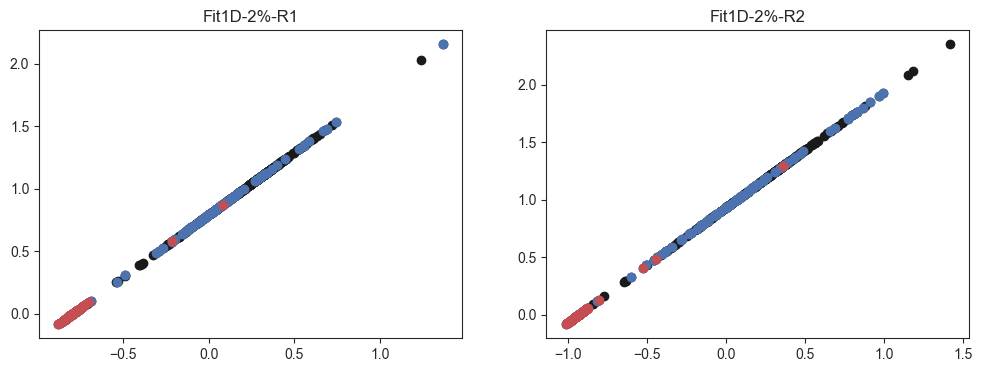

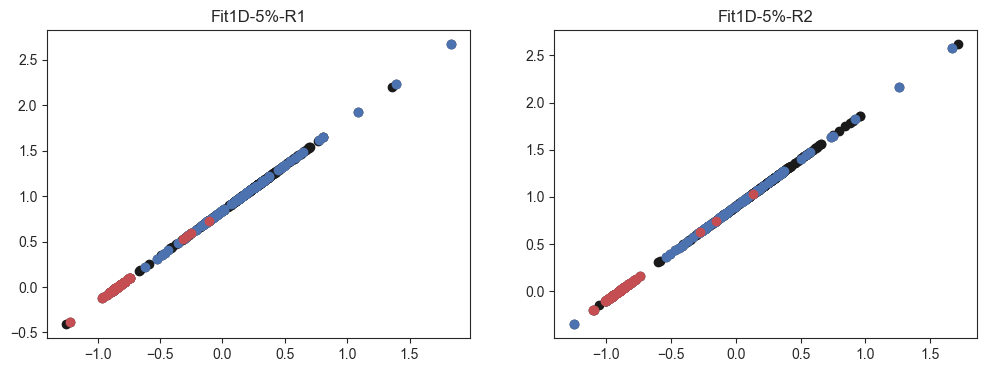

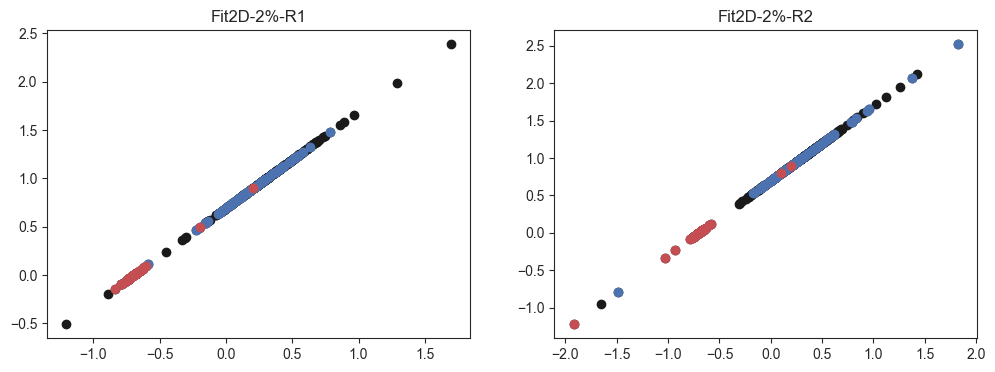

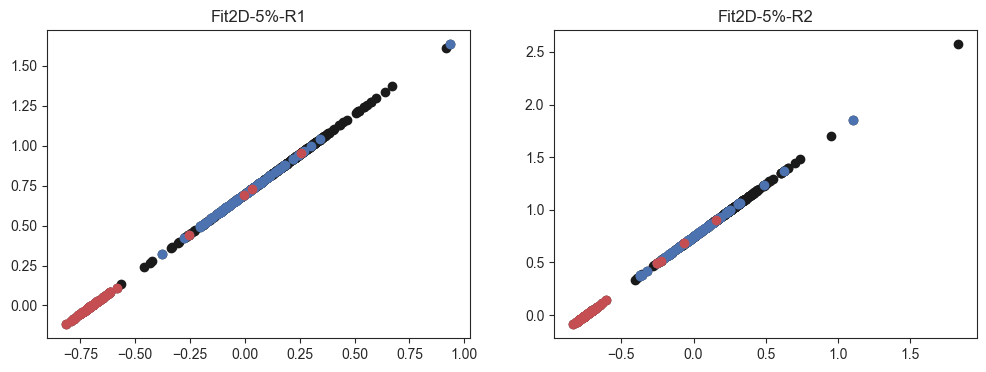

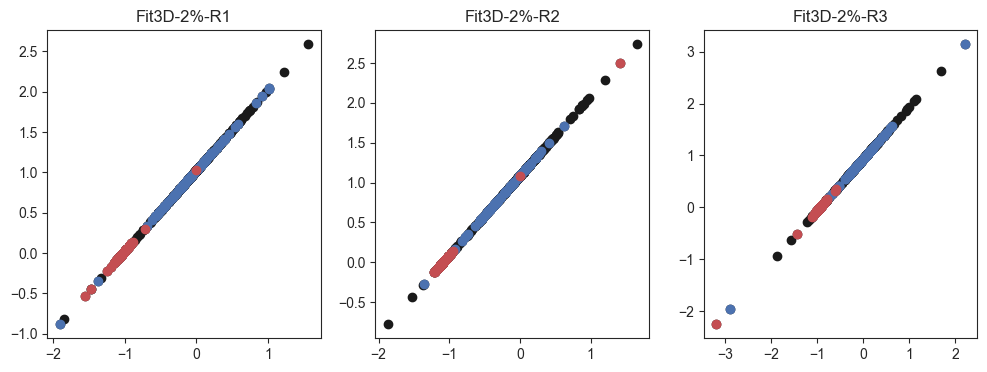

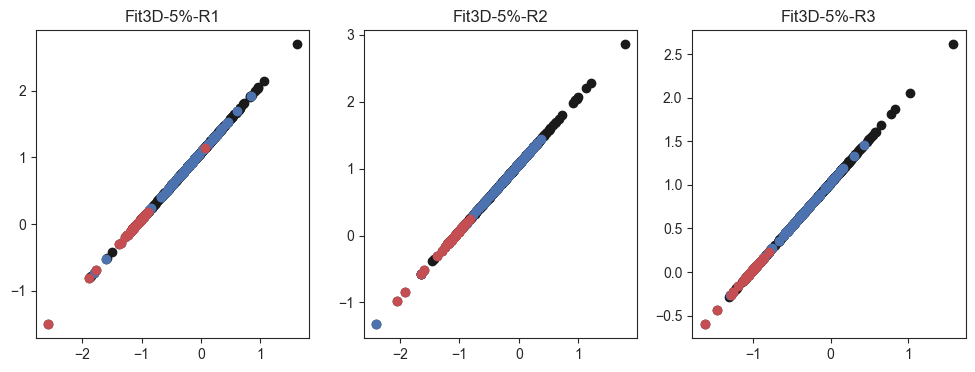

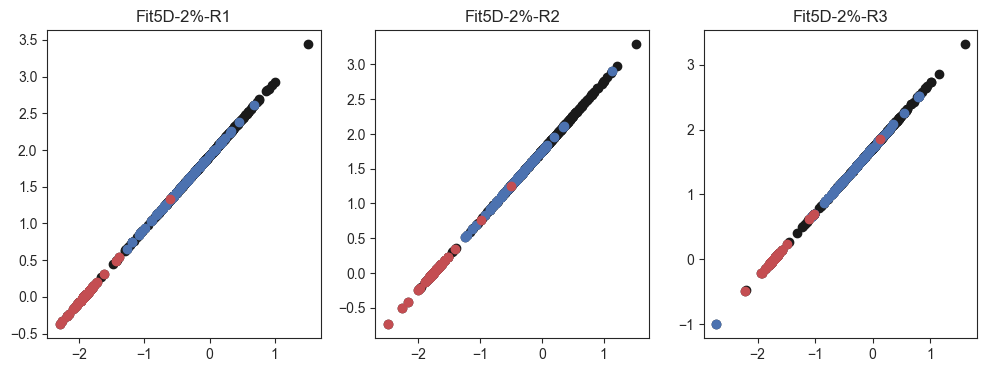

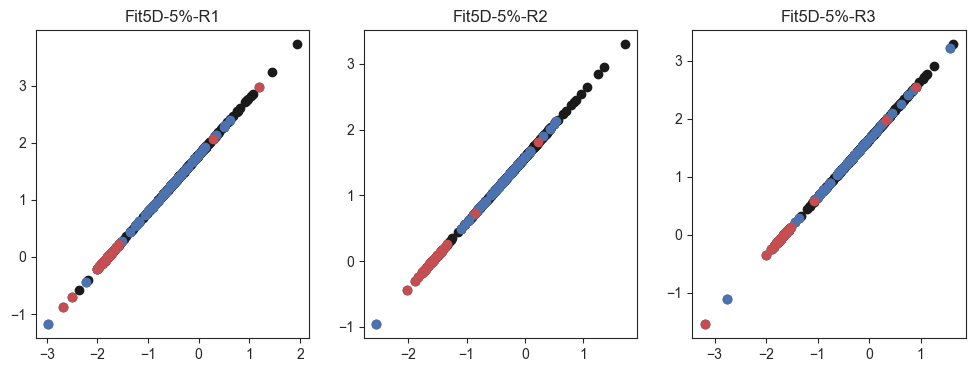

In [25]:
## Testing Li Mutatns fitness calculation...

li_mutants = merged_fitness[merged_fitness['source_publication']=='Li2019']
li_diploids = li_mutants[li_mutants['class']=='pure_diploids']
li_neutrals = li_mutants[li_mutants['class']=='neutral_haploids']

for condition in conditions:
    plt.figure(figsize=(12,4))
    for r,replicate in enumerate(replicates[condition]):
        plt.subplot(1,len(replicates[condition]),r+1)
        plt.title(f'{condition}-R{replicate}')
        plt.scatter(li_mutants[f'{condition}-R{replicate}_fitness'].values,
                    li_mutants[f'{condition}-R{replicate}_fitness_Li2019Neutrals'].values,color='k')
        plt.scatter(li_diploids[f'{condition}-R{replicate}_fitness'].values,li_diploids[f'{condition}-R{replicate}_fitness_Li2019Neutrals'].values,color='b',label='Neutrals')
        plt.scatter(li_neutrals[f'{condition}-R{replicate}_fitness'].values,li_neutrals[f'{condition}-R{replicate}_fitness_Li2019Neutrals'].values,color='r',label='Neutrals')





In [26]:
merged_fitness.to_csv(f'{home_dir}/data/EvolvingFront_2%5%FitnessMeasurementData.csv',index=False)

In [27]:
time_fitness_df = p.DataFrame()

for condition in ['Fit1D-2%','Fit1D-5%','Fit2D-2%','Fit2D-5%','Fit3D-2%','Fit3D-5%','Fit5D-2%','Fit5D-5%']:
    for rep in replicates[condition]:
        for timepoint in range(timepoints[condition]-1):
            print(condition,rep,timepoint)
            time_fitness_df[f'{condition}_R{rep}_T{timepoint}'] = time_fitnesses[f'{condition}-R{rep}_fitness'][:,timepoint]
            time_fitness_df[f'{condition}_R{rep}_T{timepoint}_error'] = time_fitnesses[f'{condition}-R{rep}_error'][:,timepoint]
            
time_fitness_df['barcode'] = fitness_df['barcode']

time_fitness_df = time_fitness_df.merge(merged_fitness,on='barcode')

time_fitness_df.to_csv(f'{home_dir}/data/EvolvingFront_2%5%FitnessMeasurementData_fitnessByTime.csv',index=False)
# this_df[f'rep{rep_y}_T{timepoint}'] = time_fitnesses[f'{condition}-R{rep_y}_fitness'][:,timepoint]

Fit1D-2% 1 0
Fit1D-2% 1 1
Fit1D-2% 1 2
Fit1D-2% 1 3
Fit1D-2% 1 4
Fit1D-2% 1 5
Fit1D-2% 2 0
Fit1D-2% 2 1
Fit1D-2% 2 2
Fit1D-2% 2 3
Fit1D-2% 2 4
Fit1D-2% 2 5
Fit1D-5% 1 0
Fit1D-5% 1 1
Fit1D-5% 1 2
Fit1D-5% 1 3
Fit1D-5% 1 4
Fit1D-5% 1 5
Fit1D-5% 2 0
Fit1D-5% 2 1
Fit1D-5% 2 2
Fit1D-5% 2 3
Fit1D-5% 2 4
Fit1D-5% 2 5
Fit2D-2% 1 0
Fit2D-2% 1 1
Fit2D-2% 1 2
Fit2D-2% 1 3
Fit2D-2% 1 4
Fit2D-2% 1 5
Fit2D-2% 2 0
Fit2D-2% 2 1
Fit2D-2% 2 2
Fit2D-2% 2 3
Fit2D-2% 2 4
Fit2D-2% 2 5
Fit2D-5% 1 0
Fit2D-5% 1 1
Fit2D-5% 1 2
Fit2D-5% 1 3
Fit2D-5% 1 4
Fit2D-5% 1 5
Fit2D-5% 2 0
Fit2D-5% 2 1
Fit2D-5% 2 2
Fit2D-5% 2 3
Fit2D-5% 2 4
Fit2D-5% 2 5
Fit3D-2% 1 0
Fit3D-2% 1 1
Fit3D-2% 2 0
Fit3D-2% 2 1
Fit3D-2% 3 0
Fit3D-2% 3 1
Fit3D-5% 1 0
Fit3D-5% 1 1
Fit3D-5% 2 0
Fit3D-5% 2 1
Fit3D-5% 3 0
Fit3D-5% 3 1
Fit5D-2% 1 0
Fit5D-2% 1 1
Fit5D-2% 2 0
Fit5D-2% 2 1
Fit5D-2% 3 0
Fit5D-2% 3 1
Fit5D-5% 1 0
Fit5D-5% 1 1
Fit5D-5% 2 0
Fit5D-5% 2 1
Fit5D-5% 3 0
Fit5D-5% 3 1


/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/1889471309.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_fitness_df[f'{condition}_R{rep}_T{timepoint}'] = time_fitnesses[f'{condition}-R{rep}_fitness'][:,timepoint]
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/1889471309.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  time_fitness_df[f'{condition}_R{rep}_T{timepoint}_error'] = time_fitnesses[f'{condition}-R{rep}_error'][:,timepoint]
/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T

/var/folders/9y/6d7h4kvn6f989_h_gypc_j_00000gn/T/ipykernel_65498/2403261594.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 640x480 with 0 Axes>

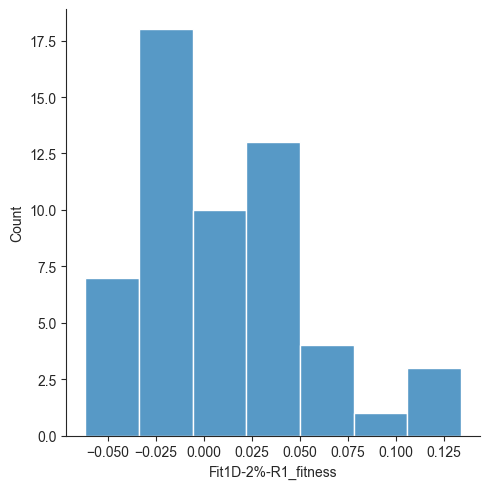

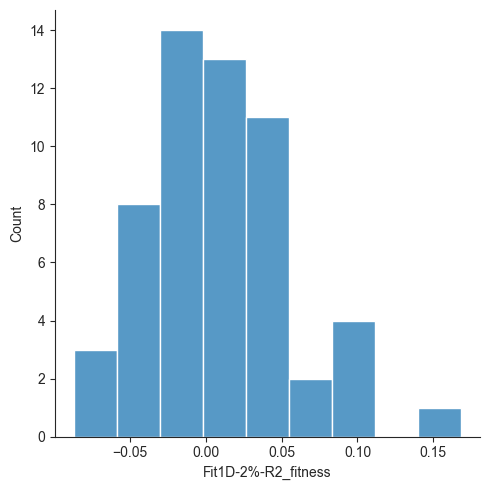

<Figure size 640x480 with 0 Axes>

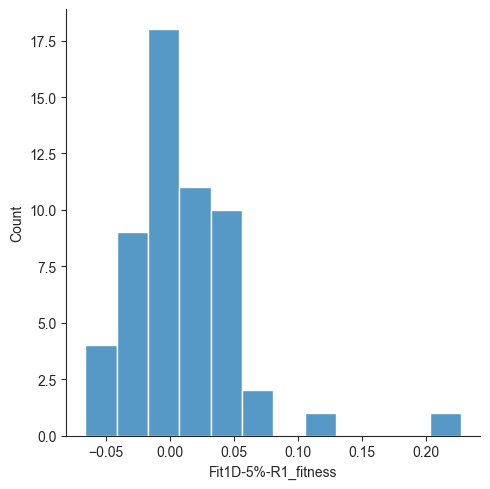

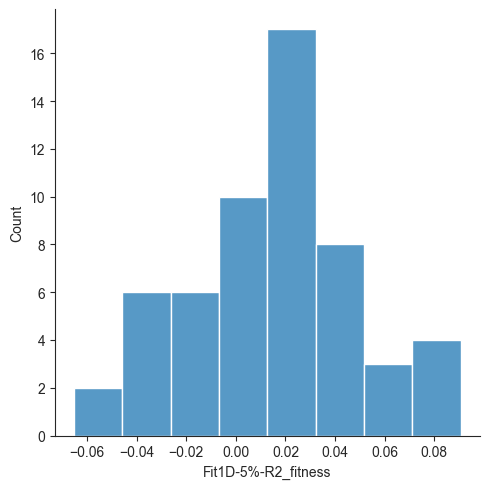

<Figure size 640x480 with 0 Axes>

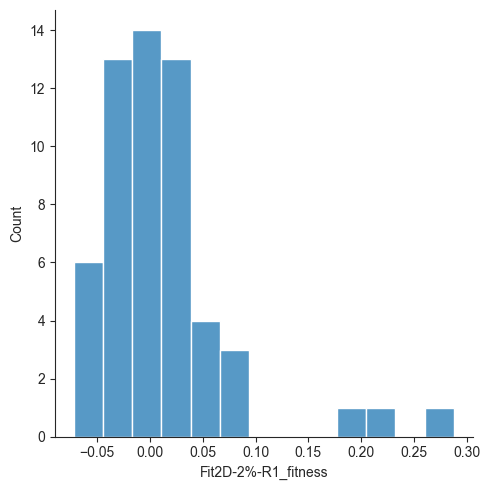

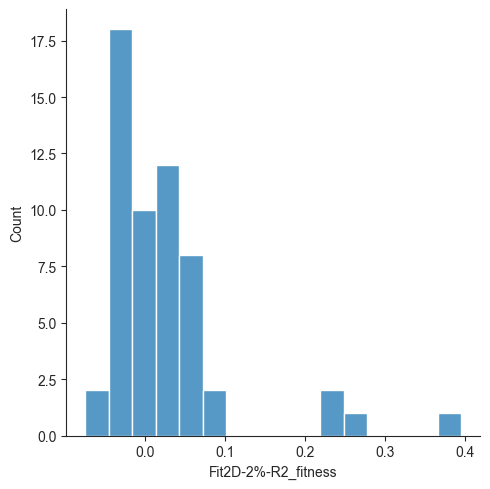

<Figure size 640x480 with 0 Axes>

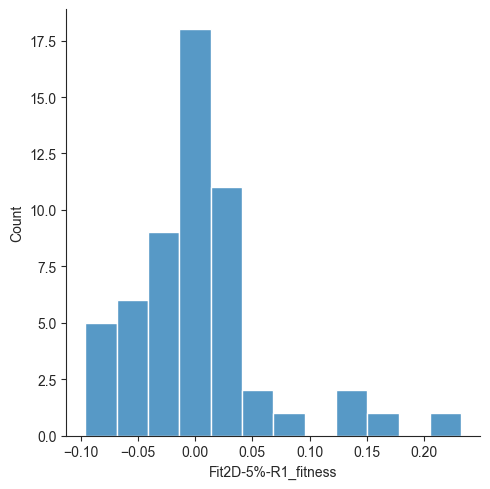

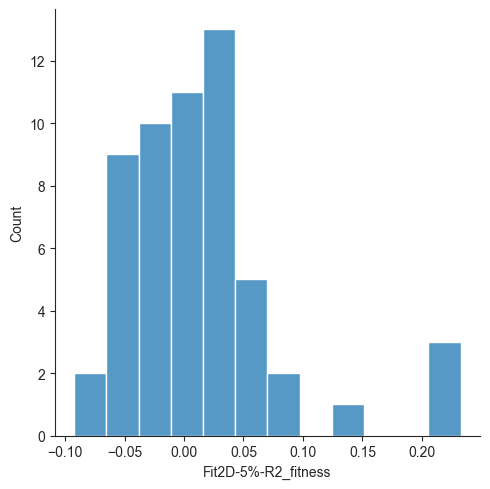

<Figure size 640x480 with 0 Axes>

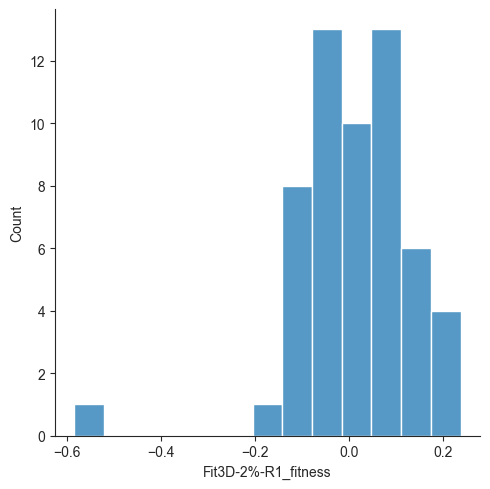

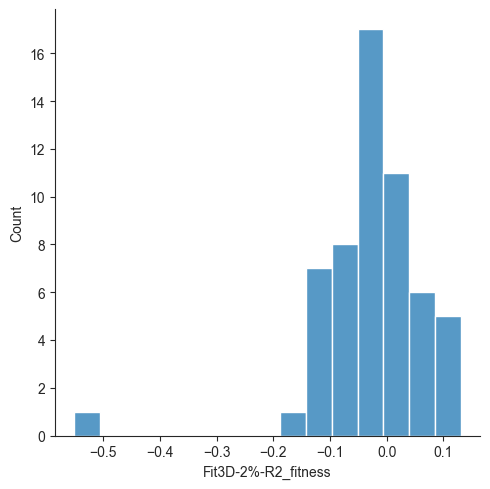

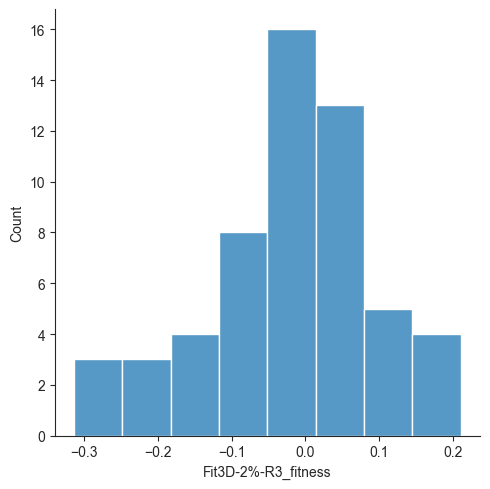

<Figure size 640x480 with 0 Axes>

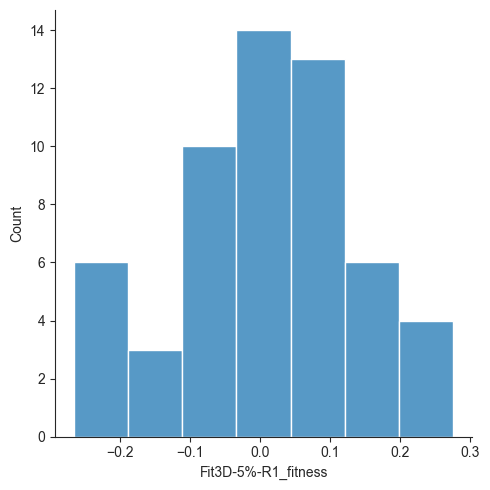

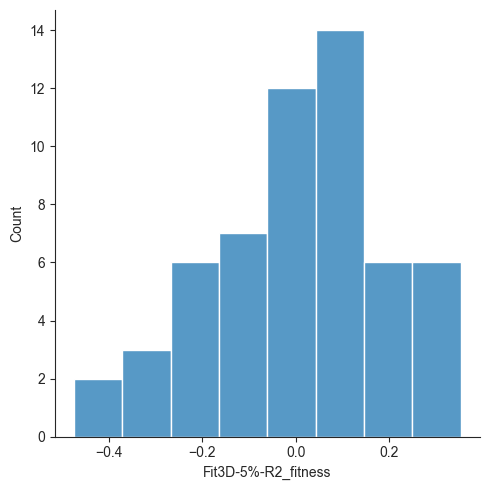

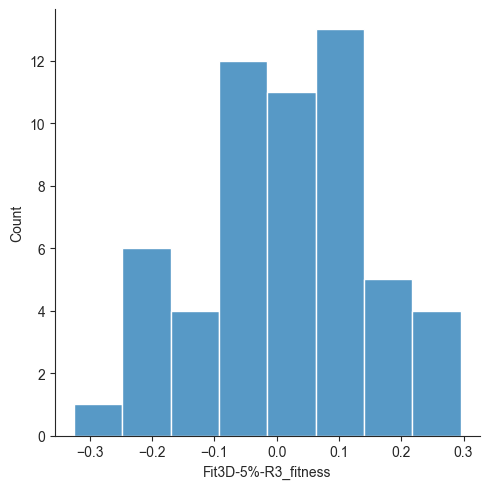

<Figure size 640x480 with 0 Axes>

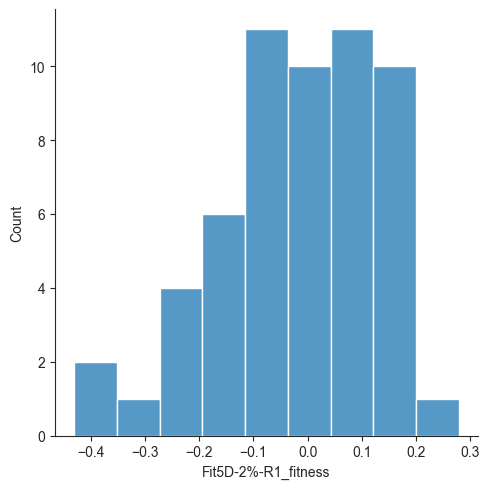

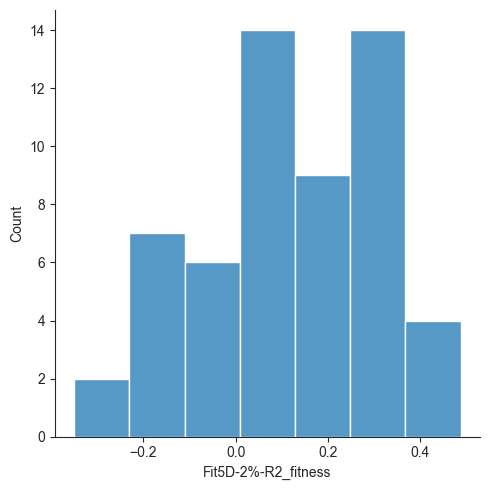

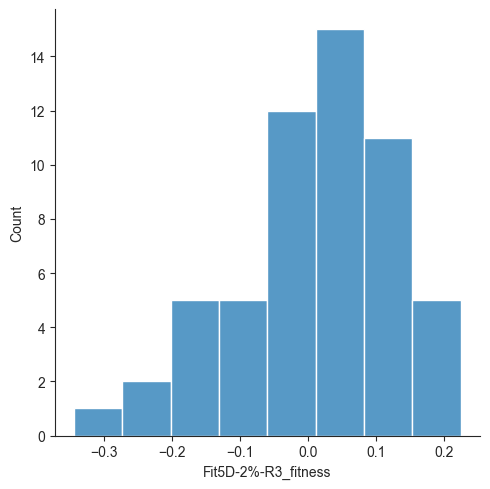

<Figure size 640x480 with 0 Axes>

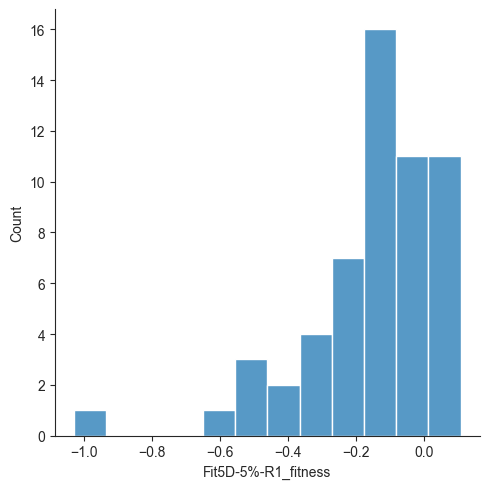

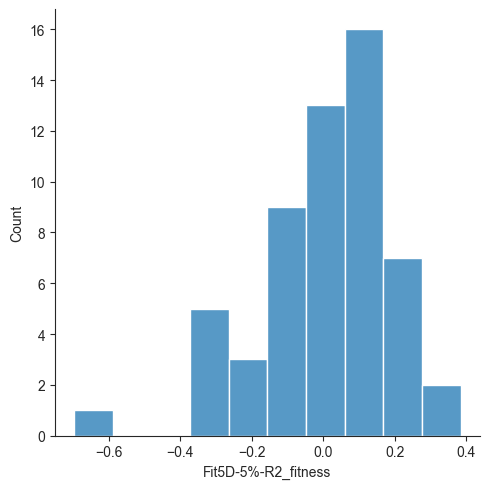

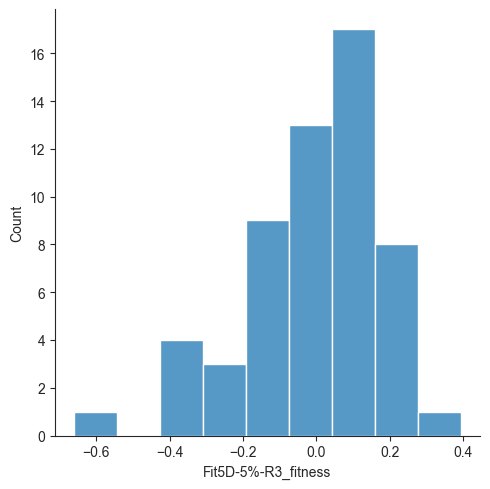

In [28]:
sns.set_palette('tab10')
for condition in conditions:
    plt.figure()
    for rep in replicates[condition]:
        sns.displot(merged_fitness[merged_fitness['barcode'].isin(handpicked_neutrals)][f'{condition}-R{rep}_fitness'])

FileNotFoundError: [Errno 2] No such file or directory: 'plots/Fit1D-2%-R1_timepoint_fitness_comparison.pdf'

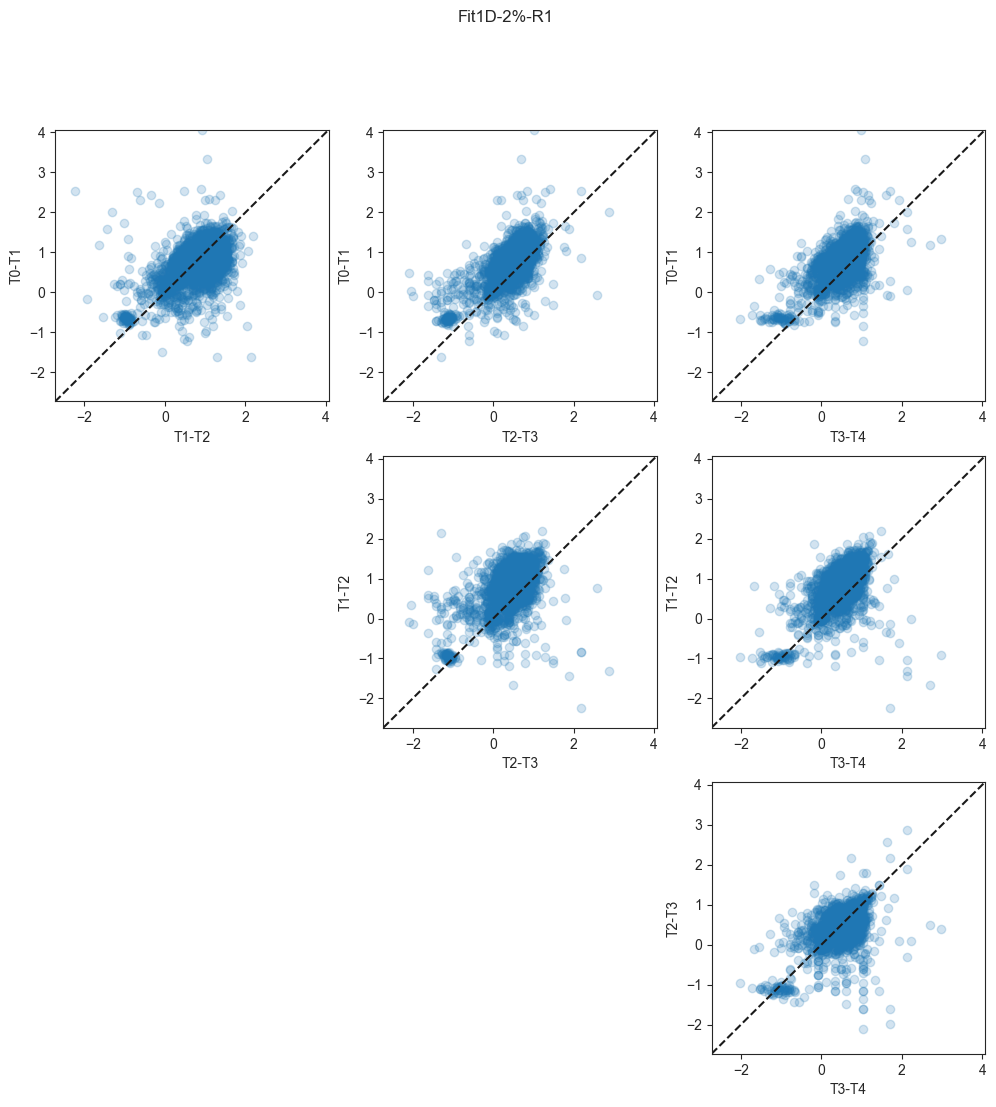

In [29]:
for condition in conditions:
    for rep in replicates[condition]:
        
        bigmin = np.nanmin(time_fitnesses[f'{condition}-R{rep}_fitness'])
        bigmax = np.nanmax(time_fitnesses[f'{condition}-R{rep}_fitness'])
        plt.figure(figsize=(4*3,4*3))
        plt.suptitle(f'{condition}-R{rep}')
#         counter = 0
        for x,y in combinations(range(4),2):
            plt.subplot(3,3,3*x+y)
#             counter += 1
            plt.scatter(time_fitnesses[f'{condition}-R{rep}_fitness'][:,y],
                        time_fitnesses[f'{condition}-R{rep}_fitness'][:,x],
                       alpha=0.2)
            plt.xlabel(f'T{y}-T{y+1}')
            plt.ylabel(f'T{x}-T{x+1}')
            
            plt.xlim(bigmin,bigmax)
            plt.ylim(bigmin,bigmax)
            
            plt.plot([bigmin,bigmax],[bigmin,bigmax],'k--')
        plt.savefig(f'plots/{condition}-R{rep}_timepoint_fitness_comparison.pdf',bbox_inches='tight')

In [30]:
for condition in conditions:
    plt.figure(figsize=(4*scipy.special.comb(len(replicates[condition]),2),4))
    for i,(rep1,rep2) in enumerate(combinations(replicates[condition],2)):
        plt.subplot(1,scipy.special.comb(len(replicates[condition]),2),i+1)
        plt.scatter(fitness_df[f'{condition}-R{rep1}_fitness'].values,fitness_df[f'{condition}-R{rep2}_fitness'].values,alpha=0.2)
        plt.xlabel(f'{condition}-R{rep1} fitness')
        plt.ylabel(f'{condition}-R{rep2} fitness')
        
        xmin,xmax = plt.xlim()
        ymin,ymax = plt.ylim()
        new_min = np.min([xmin,ymin])
        new_max = np.max([xmax,ymax])

        plt.xlim(new_min,new_max)
        plt.ylim(new_min,new_max)
        plt.plot([new_min,new_max],[new_min,new_max],'k--')
        plt.tight_layout()
        
#     plt.savefig(f'plots/{condition}_replicate_correlation.pdf',bbox_inches='tight')

ValueError: Number of columns must be a positive integer, not 1.0

<Figure size 400x400 with 0 Axes>

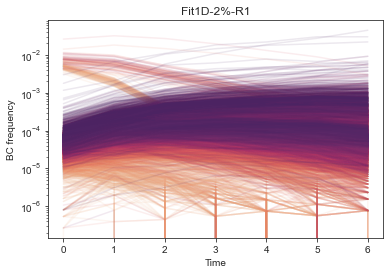

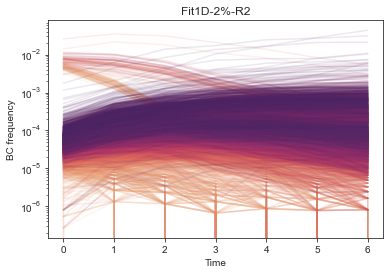

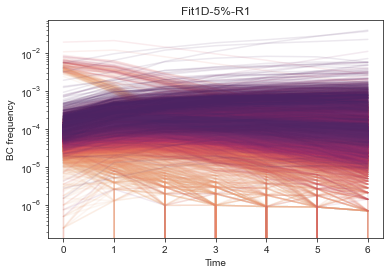

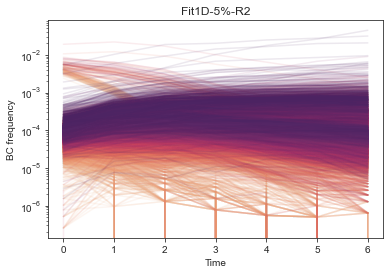

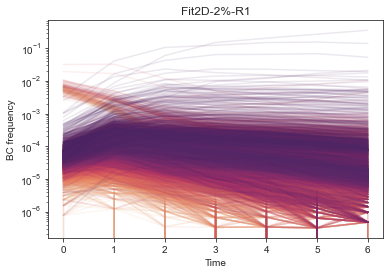

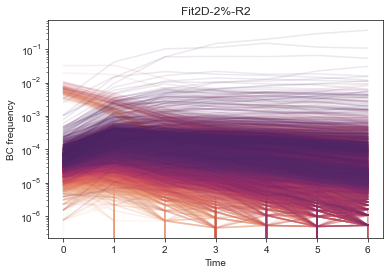

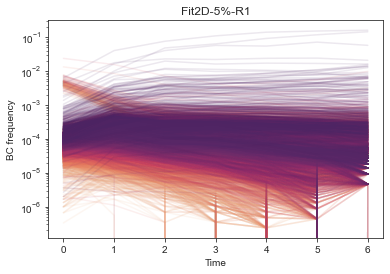

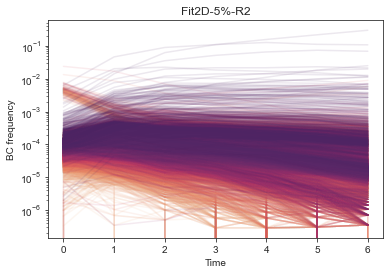

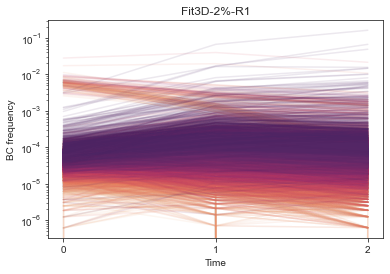

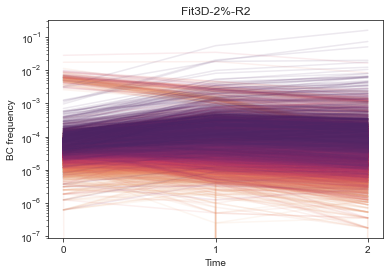

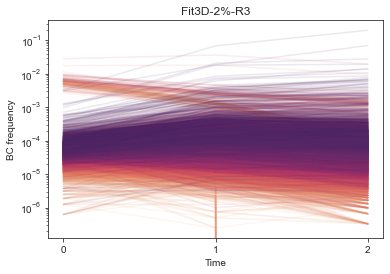

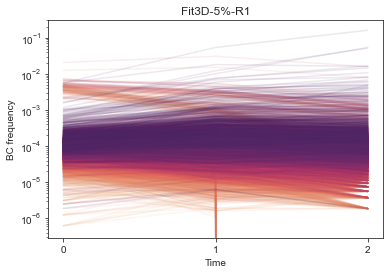

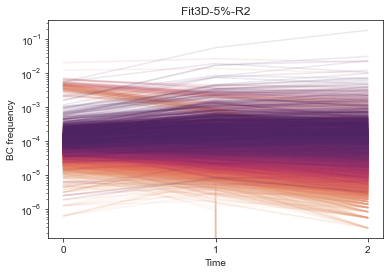

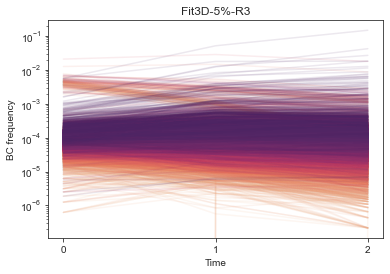

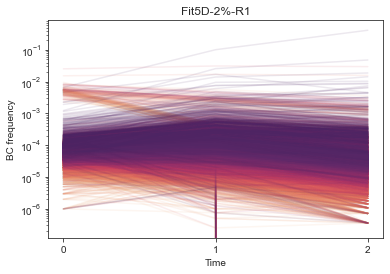

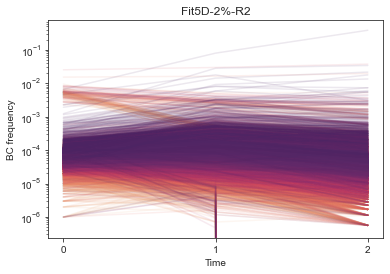

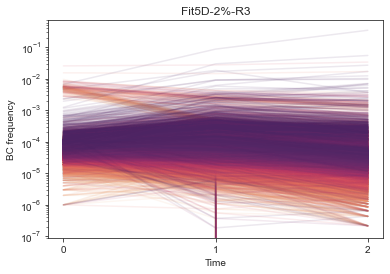

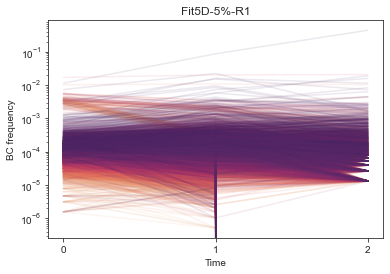

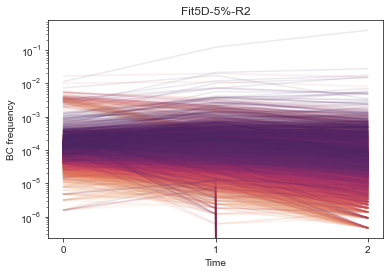

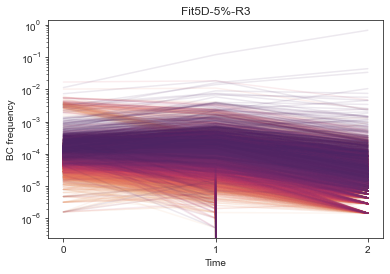

In [55]:
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']

for condition in conditions:
    for rep in replicates[condition]:
        
        order = np.argsort(merged_fitness['Fit2D-5%-R1_fitness'])
        new_order = []
        counter = -1
        for bc,o in zip(merged_fitness['barcode'].values,order):

            if bc in bc_counts['barcode']:
                new_order.append(o)
            else:
                new_order.append(counter)
                counter -= 1 

        new_order = np.argsort(new_order)
        
        sns.set_palette('flare',n_colors=len(bc_counts.values))
        
#         sns.color_palette()
        
        plt.figure()
        rep_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]

        these_counts = bc_counts[rep_times].values # get rid of ancestor sequence
        these_freqs = these_counts/np.nansum(these_counts,axis=0)

        plt.plot(range(timepoints[condition]),these_freqs.swapaxes(0,1)[:,new_order],alpha=0.1)
        plt.yscale('log')
        plt.ylabel('BC frequency')
        
        plt.xticks(range(timepoints[condition]),range(timepoints[condition]))
        plt.xlabel('Time')
        
        plt.title(f'{condition}-R{rep}')

        plt.savefig(f'plots/{condition}-R{rep}_frequencytrajectories_fitnesscolors.pdf',bbox_inches='tight')

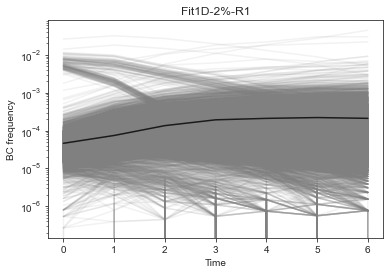

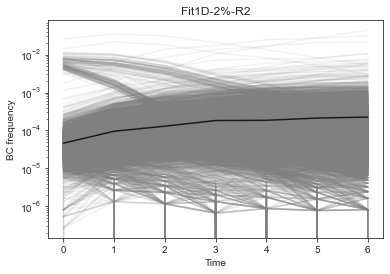

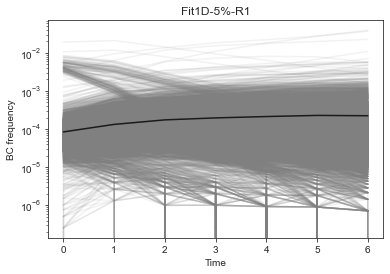

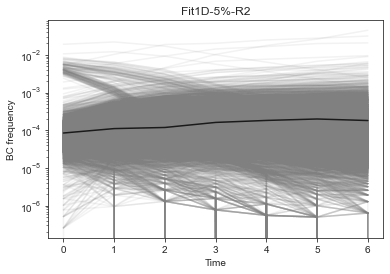

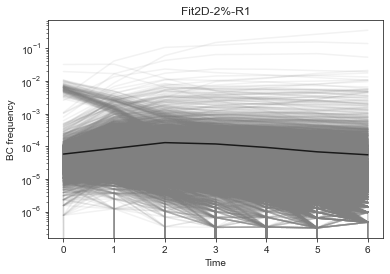

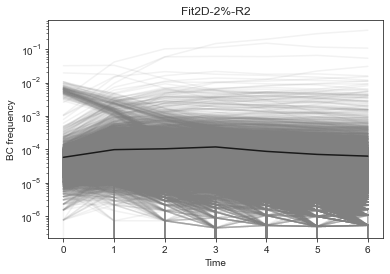

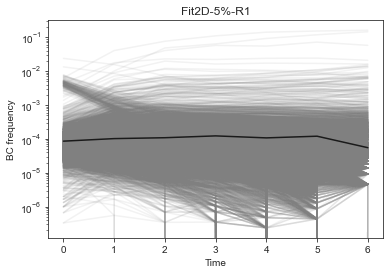

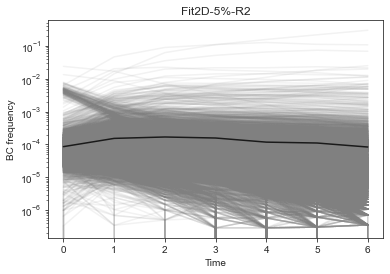

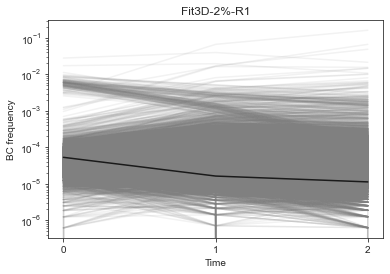

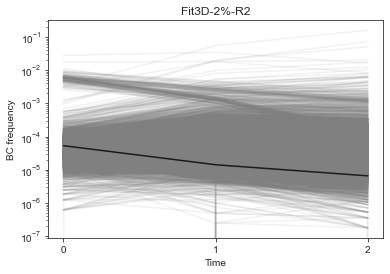

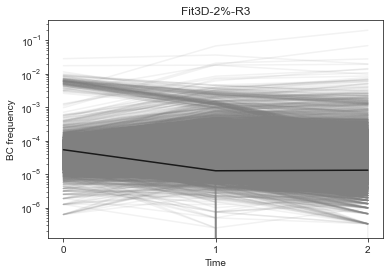

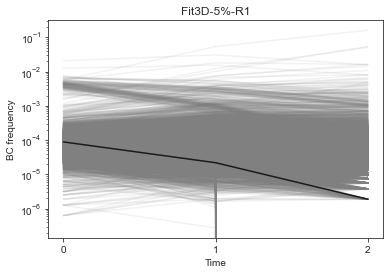

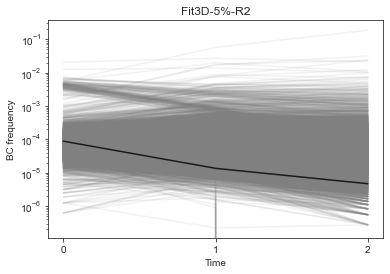

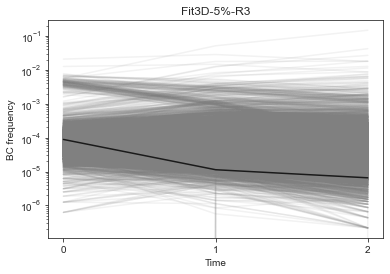

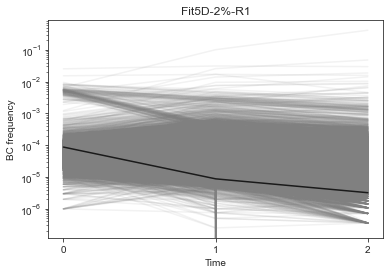

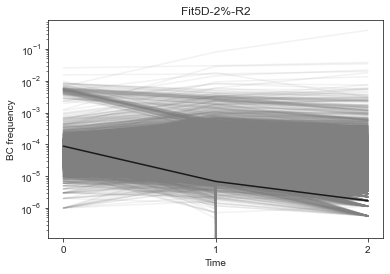

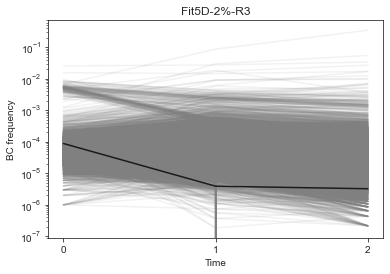

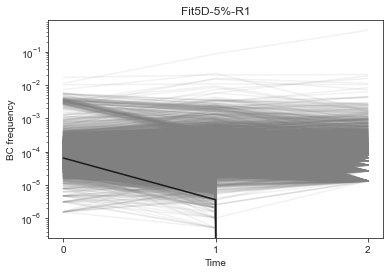

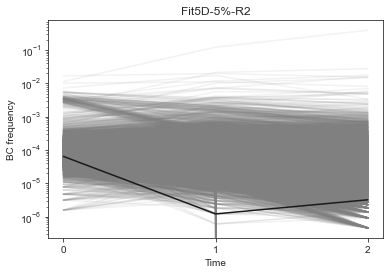

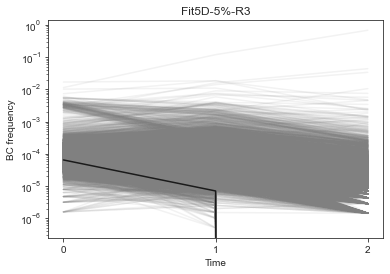

In [56]:
conditions = ['Fit1D-2%','Fit1D-5%',
              'Fit2D-2%','Fit2D-5%',
              'Fit3D-2%','Fit3D-5%',
              'Fit5D-2%','Fit5D-5%']

barcodes_to_highlight = ['CGCTAAAGACATAATGTGGTTTGTTG_AGAGTAATCTGCAAGATTCTTTTTCT']

for condition in conditions:
    for rep in replicates[condition]:
        
        sns.set_palette('flare',n_colors=len(bc_counts.values))
        
#         sns.color_palette()
        
        plt.figure()
        rep_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]

        these_counts = bc_counts[rep_times].values # get rid of ancestor sequence
        these_freqs = these_counts/np.nansum(these_counts,axis=0)

        plt.plot(range(timepoints[condition]),these_freqs.swapaxes(0,1)[:,:],alpha=0.1,color='gray')
        bc_locs = np.where(bc_counts['barcode'].isin(barcodes_to_highlight))[0]
        plt.plot(range(timepoints[condition]),these_freqs.swapaxes(0,1)[:,bc_locs],alpha=1,color='k')
        plt.yscale('log')
        plt.ylabel('BC frequency')
        
        plt.xticks(range(timepoints[condition]),range(timepoints[condition]))
        plt.xlabel('Time')
        
        plt.title(f'{condition}-R{rep}')

In [ ]:
time_fitness_df = p.DataFrame()

for condition in ['Fit1D-2%','Fit1D-5%','Fit2D-2%','Fit2D-5%','Fit3D-2%','Fit3D-5%','Fit5D-2%','Fit5D-5%']:
    for rep in replicates[condition]:
        for timepoint in range(timepoints[condition]-1):
            print(condition,rep,timepoint)
            time_fitness_df[f'{condition}_R{rep}_T{timepoint}'] = time_fitnesses[f'{condition}-R{rep}_fitness'][:,timepoint]
            time_fitness_df[f'{condition}_R{rep}_T{timepoint}_error'] = time_fitnesses[f'{condition}-R{rep}_error'][:,timepoint]
            

In [31]:
for condition in conditions:
    rep_times = {}
    r_timepoints = []
    for rep in replicates[condition]:
        
        these_times = [f'{condition}-T0_combined'] + [f'{condition}-R{rep}-T{t}_combined' for t in range(1,timepoints[condition])]
        these_timepoints = [t for t in range(timepoints[condition])]
        
                    
        r_timepoints.append(timepoints)
        
        rep_times[rep] = np.nan_to_num(bc_counts[these_times].values,0)
        
        for entry in these_times:
            cols_to_remove.append(entry) # don't include the count files in the final fitness dataframe
        
        print(f'{condition}-R{rep}')
        print(np.sum(rep_times[rep],axis=0))
    print(f'{condition}')
#     answer = atish.inferFitness(bc_counts['BCID'].values,these_timepoints,rep_times,
#                                 neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=False,useMultNoise=True,weightedMean=weighted)
    answer = atish.inferFitness(bc_counts['BCID'].values,these_timepoints,rep_times,
                                neutralBarcodes=handpicked_neutrals_BCID,lowCoverageThresh=cov_thresh,use_all_neutral=False,useMultNoise=False,weightedMean=weighted)

#    bc
    break

Fit1D-2%-R1
[3700938 2527989 2219395 1824354 1333313 1762964 1288419]
Fit1D-2%-R2
[3700938  754263  857085 1504769 1144488 1286105 1229090]
Fit1D-2%
neutrals inside 56
neutral reads True 26959.0 14286.0
neutral reads True 14286.0 6622.0
neutral reads True 6622.0 2942.5
neutral reads True 2942.5 1086.5
neutral reads True 1086.5 683.0
neutral reads True 683.0 231.5
neutral reads False 26959.0 14290.5
neutral reads False 14290.5 6667.0
neutral reads False 6667.0 3037.0
neutral reads False 3037.0 1093.5
neutral reads False 1093.5 697.5
neutral reads False 697.5 232.5
neutral reads True 26959.0 4394.5
neutral reads True 4394.5 3027.0
neutral reads True 3027.0 2401.0
neutral reads True 2401.0 952.5
neutral reads True 952.5 483.5
neutral reads True 483.5 219.0
neutral reads False 27628.0 4470.0
neutral reads False 4470.0 3103.0
neutral reads False 3103.0 2587.0
neutral reads False 2587.0 1020.0
neutral reads False 1020.0 530.0
neutral reads False 530.0 220.0
Multiplicative noise consistency c

/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:235: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:235: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:406: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/code/processing/FitnessMeasurements/fitness_assay_grantedits.py:406: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totRe

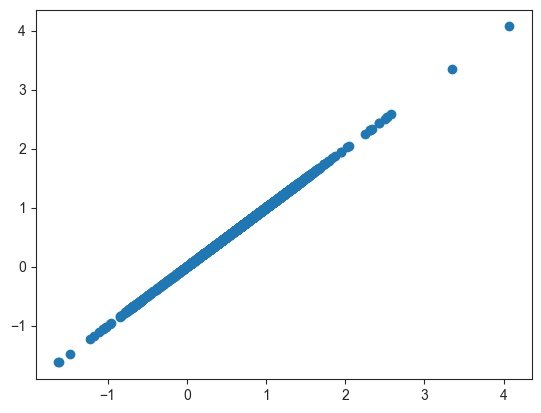

In [37]:
plt.scatter(answer[1]['allTimeFitness'][:,0],time_fitnesses['Fit1D-2%-R1_fitness'][:,0])

In [35]:
transformed_

{'Fit1D-2%-R1_fitness': array([[ 0.95111849,  0.97512126,  0.75190349,  0.72777723,  0.75808283,
          0.76276681],
        [ 1.04115761,  1.14189548,  1.10589904,  0.88850599,  1.04298618,
          0.78713774],
        [ 1.01372663,  1.25059851,  0.77461515,  0.82754047,  0.82737211,
          0.80739232],
        ...,
        [ 0.52823873,  1.09407019,  0.28350635,  0.25934657,  0.63195788,
          0.45198512],
        [ 0.79965203,  1.54501724,  0.48244487,  0.86067127,  0.51550375,
          0.87646426],
        [-0.42133046,  1.39103366,         nan,         nan,  0.44963633,
          1.09861229]]),
 'Fit1D-2%-R1_error': array([[0.31342496, 0.20782209, 0.19934525, 0.09571925, 0.13182943,
         0.10371567],
        [0.10709994, 0.10589254, 0.147307  , 0.06542772, 0.0957208 ,
         0.06641054],
        [0.34714957, 0.20334979, 0.19575524, 0.09133087, 0.12464932,
         0.0954735 ],
        ...,
        [0.90273486, 0.52169926, 0.50459558, 0.32347593, 0.44687708,
    

In [102]:

columns = ['Fit1D-2%-T0_combined','Fit1D-2%-R1-T1_combined']
# bc_freqs = bc_counts/np.sum(bc_counts,axis=0)
1
neutrals=bc_counts[bc_counts['barcode'].isin(handpicked_neutrals)] 
# neutral_freqs =bc_freqs[bc_freqs['barcode'].isin(handpicked_neutrals)] 



transformed = np.log(bc_counts[columns]+1) - np.median(np.log(neutrals[columns]+1),axis=0)

new_f = transformed['Fit1D-2%-R1-T1_combined']-transformed['Fit1D-2%-T0_combined']

old_method = np.log((bc_counts[columns[1]])/ (bc_counts[columns[0]]))  - np.log(np.sum(neutrals[columns[1]])/np.sum(neutrals[columns[0]]))

# old_method = np.log((bc_counts[columns[1]])/ (bc_counts[columns[0]])) 
# old_method = old_method - np.log(np.sum((neutrals[columns[1]]) / np.sum((neutrals[columns[0]])/np.sum(bc_counts[columns[0]]))) 

/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/EvolvingFront-venv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/grantkinsler/Documents/Stanford/Research/EvolvingFront/EvolvingFront-venv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       0.901590
1       0.991629
2       0.964198
3       1.062281
4       0.940015
          ...   
5022    0.536403
5023    0.802132
5024    0.478710
5025    0.750123
5026   -0.470859
Length: 5027, dtype: float64

In [94]:
np.log((bc_freqs[columns[1]])/np.nansum(bc_freqs[columns[1]])  / (bc_freqs[columns[0]])/np.nansum(bc_freqs[columns[0]])) 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5022   NaN
5023   NaN
5024   NaN
5025   NaN
5026   NaN
Length: 5027, dtype: float64

In [66]:
new_f = transformed['Fit1D-2%-R1-T1_combined']-transformed['Fit1D-2%-T0_combined']

Text(0, 0.5, 'Raw calculation')

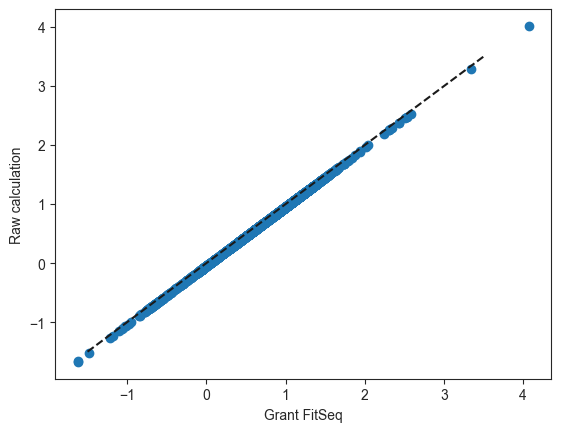

In [105]:
plt.scatter(time_fitnesses['Fit1D-2%-R1_fitness'][:,0],old_method)
plt.plot([-1.5,3.5],[-1.5,3.5],'k--')
plt.xlabel("Grant FitSeq")
plt.ylabel("Raw calculation")
# plt.yscale('log')
# plt.xscale('log')

Text(0, 0.5, "$log((f_{t+1}+1)/(f_{t}+1))-log((\\rho_{t+1}+1)/(\\rho_{t}+1))$ (Olivia's method)")

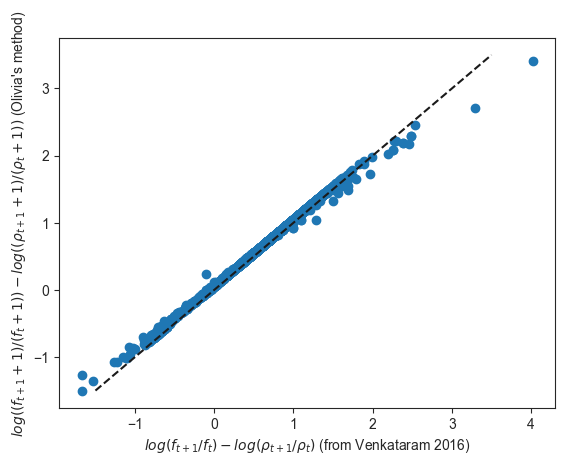

In [110]:
plt.scatter(old_method,new_f)
plt.plot([-1.5,3.5],[-1.5,3.5],'k--')
plt.xlabel(r"$log(f_{t+1}/f_{t})-log(\rho_{t+1}/\rho_{t})$ (from Venkataram 2016)")
plt.ylabel(r"$log((f_{t+1}+1)/(f_{t}+1))-log((\rho_{t+1}+1)/(\rho_{t}+1))$ (Olivia's method)")
# plt.yscale('log')
# plt.xscale('log')